In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns
#print(df.shape)

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


#### Dataset  talleres
**ide_ope**: id operación
**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo  
**dispositivo**: dispositivo recopilación datos telemetria
**subarea**: agrupación de operaciones relacionadas
**fechaope**: fecha de la operación
**fecha_ent**: fecha entrada en taller

In [2]:
pd.options.display.max_rows=60


pd.options.display.max_columns=50


In [3]:
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_Nant_560_480.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_all_acc1.csv',sep=';')

df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_mix_560_480.csv',sep=';')
print(df.shape)
df

(12516, 33)


,id_ope,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fechaope,fecha_ent,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
0,71169,B116,13,ALEJANDRO,480 top,Aire acondicionado,Climatización,2016-09-09,2016-09-07,10,129,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
1,71170,B116,13,ALEJANDRO,480 top,Cambio o limpieza prefiltro gasoil,Gasoil,2016-09-09,2016-09-07,10,4905,355.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
2,71171,B116,13,ALEJANDRO,480 top,Compresor a.a,Climatización,2016-09-09,2016-09-07,10,235,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
3,71172,B116,13,ALEJANDRO,480 top,Valvulas a.a,Climatización,2016-09-09,2016-09-07,10,4905,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
4,72010,B116,13,GUILLERMO,480 top,Tapacubos,Ruedas,2016-09-29,2016-09-29,7,335,62.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,2091.02,890.40,NaN,NaN,NaN,0.0,0.0,2455.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,165626,H099,12,BERMEJO,480 top,Retrovisor derecho,Carrocería,2021-09-21,2021-09-21,13,55,55.0,52,MAN,CITTOUR,12.85,12310.0,10518.0,228.0,Urbano,Normal,76208.76,30849.32,0.0,0.0,NaN,0.0,0.0,55597.00,0.00,NaN,NaN,NaN
12512,165627,H132,2,NaN,480 top,Fallo en AVS,Fallo en AVS,2021-09-22,2021-09-21,6,671,NaN,29,MERCEDES BENZ,DYPARRO,8.79,4960.0,2987.0,140.0,Discrecional,Microbus,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
12513,165628,H109,14,ALEJANDRO,480 top,Aire acondicionado,Climatización,2021-09-21,2021-09-21,5,5,5.0,66,SCANIA,HABIT,10.58,10689.0,8867.0,169.0,Urbano,Midibus,177620.78,80422.08,0.0,0.0,NaN,0.0,0.0,202801.00,0.00,NaN,NaN,NaN
12514,165637,T340,3,NaN,560,Luces exteriores,Luces,2021-09-21,2021-09-21,21,1110,91.0,45,MAN,LION'S COACH L,13.90,15202.0,12419.0,338.0,Discrecional,Normal,126937.48,38326.00,16100.0,37149.0,5598.0,742821.0,742332.0,54426.36,104922.13,1371.36,31.375935,1.21


In [4]:
df.dtypes

id_ope                       int64
v_codigbus                  object
v_edad                       int64
aliasemp                    object
dispositivo                 object
nomopera                    object
subarea                     object
fechaope                    object
fecha_ent                   object
ndias_ant                    int64
ndias_ant_tipo               int64
ndias_ant_subarea          float64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                   float64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)    

In [5]:
df['fechaope'] = pd.to_datetime(df['fechaope'])
df['fecha_ent'] = pd.to_datetime(df['fecha_ent'])

In [6]:
len(df.columns)

33

In [7]:
df.describe()

,id_ope,v_edad,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
count,12516.000000,12516.00000,12516.000000,12516.000000,11429.000000,12516.000000,11960.000000,11960.000000,11960.000000,11960.000000,12516.000000,12516.000000,4630.000000,4630.000000,2178.000000,1.251600e+04,1.251600e+04,12516.000000,4543.000000,2091.000000,2091.000000,2091.000000
mean,123117.901326,10.77333,27.571668,910.735698,220.836294,50.375599,12.166543,12712.600167,10155.351672,274.542224,42433.973138,13798.487542,4123.720086,8503.187689,1801.703398,9.526851e+04,9.527310e+04,23469.201516,20559.440737,2495.191368,26.960644,1423.338565
std,30185.777066,4.23989,192.942513,1465.048172,331.687140,13.851577,1.682674,2731.889872,2625.136435,60.819321,56499.619227,29208.086862,8794.003015,15531.204344,5528.648891,2.973561e+05,2.976287e+05,32759.713771,43081.909024,5811.740591,15.971304,5111.130282
min,71169.000000,0.00000,-100.000000,-100.000000,1.000000,8.000000,6.700000,2900.000000,2148.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97006.750000,8.00000,4.000000,42.000000,27.000000,43.000000,12.000000,12320.000000,8867.000000,228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,129.990000,22.256364,1.245000
50%,111062.500000,11.00000,9.000000,270.000000,92.000000,55.000000,12.800000,13349.000000,10640.000000,290.000000,19309.600000,5225.435000,1.000000,0.000000,211.000000,0.000000e+00,0.000000e+00,9093.000000,0.000000,794.300000,29.222898,10.970000
75%,156209.250000,14.00000,20.000000,1017.000000,269.000000,55.000000,12.920000,13755.000000,11967.000000,320.000000,65613.150000,21049.500000,4485.750000,10474.750000,1283.000000,0.000000e+00,0.000000e+00,34536.527500,24469.740000,1897.235000,35.504620,262.375000
max,165640.000000,20.00000,6166.000000,7234.000000,3814.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000


In [8]:
df.columns

Index(['id_ope', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fechaope', 'fecha_ent', 'ndias_ant', 'ndias_ant_tipo',
       'ndias_ant_subarea', 'capacidad', 'marca', 'modelo', 'longitud', 'tara',
       'cilindrada', 'potencia', 'tipo', 'subtipo', 'sum(c.`distancia`)',
       'sum(c.`litros_totales`)', 'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)',
       'sum(c.`exc_temp`)', 'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)',
       'sum(c.`min_ral`)', 'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)',
       'AVG(c.`inercia`)', 'sum(c.`kickdown`)'],
      dtype='object')

In [9]:
df = df.drop('id_ope', 1)
df = df.drop('fechaope', 1)
#df = df.drop('f_inicio', 1)
df = df.drop('ndias_ant', 1)
df = df.drop('ndias_ant_tipo', 1)
#df = df.drop('ndias_ant_subarea', 1)
len(df.columns)

C:\Users\Dani\AppData\Local\Temp/ipykernel_9128/894264480.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id_ope', 1)


29

In [10]:
df=df.sort_values(['fecha_ent','v_codigbus'])

df.head(50)
df = df.reset_index(drop=True)

In [11]:
df['fecha_ant']=(df.groupby(['v_codigbus'])['fecha_ent'].shift(1))#- df['fechaope']).shift(-1)
df['dias'] =  (df['fecha_ent'] - df['fecha_ant']).dt.days

df=df.sort_values(['v_codigbus','fecha_ent'])
df.reset_index(inplace=True)
df['match'] = df.v_codigbus.eq(df.v_codigbus.shift())

df['dias_ant'] = np.where(((df['dias']==0)&(df['match']==True)),df['dias'].replace(to_replace=0, method='ffill').values,df['dias'])
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant
0,10287,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN
1,10593,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0
2,10594,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0
3,11378,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0
4,11626,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,NaN,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-25,1.0,True,1.0
12512,9387,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN
12513,9615,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0
12514,11764,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0


In [12]:
df['subarea_ant']=(df.groupby(['v_codigbus'])['subarea'].shift(1))


In [13]:
df.describe()

,index,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias,dias_ant
count,12516.000000,12516.00000,11429.000000,12516.000000,11960.000000,11960.000000,11960.000000,11960.000000,12516.000000,12516.000000,4630.000000,4630.000000,2178.000000,1.251600e+04,1.251600e+04,12516.000000,4543.000000,2091.000000,2091.000000,2091.000000,12288.000000,12192.000000
mean,6257.500000,10.77333,220.836294,50.375599,12.166543,12712.600167,10155.351672,274.542224,42433.973138,13798.487542,4123.720086,8503.187689,1801.703398,9.526851e+04,9.527310e+04,23469.201516,20559.440737,2495.191368,26.960644,1423.338565,17.655029,27.106873
std,3613.202319,4.23989,331.687140,13.851577,1.682674,2731.889872,2625.136435,60.819321,56499.619227,29208.086862,8794.003015,15531.204344,5528.648891,2.973561e+05,2.976287e+05,32759.713771,43081.909024,5811.740591,15.971304,5111.130282,47.495744,59.679721
min,0.000000,0.00000,1.000000,8.000000,6.700000,2900.000000,2148.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3128.750000,8.00000,27.000000,43.000000,12.000000,12320.000000,8867.000000,228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,129.990000,22.256364,1.245000,0.000000,5.000000
50%,6257.500000,11.00000,92.000000,55.000000,12.800000,13349.000000,10640.000000,290.000000,19309.600000,5225.435000,1.000000,0.000000,211.000000,0.000000e+00,0.000000e+00,9093.000000,0.000000,794.300000,29.222898,10.970000,5.000000,12.000000
75%,9386.250000,14.00000,269.000000,55.000000,12.920000,13755.000000,11967.000000,320.000000,65613.150000,21049.500000,4485.750000,10474.750000,1283.000000,0.000000e+00,0.000000e+00,34536.527500,24469.740000,1897.235000,35.504620,262.375000,17.000000,26.000000
max,12515.000000,20.00000,3814.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000,1263.000000,1263.000000


In [14]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant
0,10287,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN
1,10593,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior
2,10594,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS
3,11378,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior
4,11626,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,NaN,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-25,1.0,True,1.0,Lunas
12512,9387,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN
12513,9615,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico
12514,11764,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire


In [15]:
to_show=['fecha_ant','fecha_ent','dias','dias_ant','ndias_ant_subarea','v_codigbus','subarea', 'subarea_ant','v_edad']
df[to_show].head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
0,NaT,2021-04-15,NaN,NaN,386.0,58HC,Interior,NaN,16
1,2021-04-15,2021-05-05,20.0,20.0,NaN,58HC,ABS/EBS,Interior,16
2,2021-05-05,2021-05-05,0.0,20.0,20.0,58HC,Interior,ABS/EBS,16
3,2021-05-05,2021-06-17,43.0,43.0,449.0,58HC,Carrocería,Interior,16
4,2021-06-17,2021-07-05,18.0,18.0,61.0,58HC,Interior,Carrocería,16
5,2021-07-05,2021-07-22,17.0,17.0,225.0,58HC,Interior,Interior,16
6,2021-07-22,2021-08-04,13.0,13.0,1302.0,58HC,Fuelle,Interior,16
7,NaT,2021-02-12,NaN,NaN,2397.0,61HC,Fuelle,NaN,15
8,2021-02-12,2021-02-12,0.0,NaN,327.0,61HC,Sistema de transmisión,Fuelle,15
9,2021-02-12,2021-02-12,0.0,NaN,60.0,61HC,Motor,Sistema de transmisión,15


In [16]:
#df['dias'] = df['dias'].astype(int)
df.dtypes

index                               int64
v_codigbus                         object
v_edad                              int64
aliasemp                           object
dispositivo                        object
nomopera                           object
subarea                            object
fecha_ent                  datetime64[ns]
ndias_ant_subarea                 float64
capacidad                           int64
marca                              object
modelo                             object
longitud                          float64
tara                              float64
cilindrada                        float64
potencia                          float64
tipo                               object
subtipo                            object
sum(c.`distancia`)                float64
sum(c.`litros_totales`)           float64
sum(c.`frenazos`)                 float64
sum(c.`exc_rpm`)                  float64
sum(c.`exc_temp`)                 float64
sum(c.`metros_asc`)               

In [17]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
6334,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
6335,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6336,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6337,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
6338,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
6339,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
6340,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
6341,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
6342,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
6343,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


In [18]:
df.loc[(df['ndias_ant_subarea']>3000), to_show].sort_values('fecha_ent')

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
3402,2018-09-07,2018-09-07,0.0,94.0,3189.0,C088,ABS/EBS,Motor,11
3264,2019-05-28,2019-05-28,0.0,97.0,3813.0,C084,Alternador,Sistema eléctrico,15
1024,2019-07-10,2019-07-16,6.0,6.0,3668.0,B129,Alternador,Fuga de aire,13
3565,2020-10-06,2021-03-29,174.0,174.0,3814.0,C092,Alternador,Sistema de dirección,12
8711,2021-06-14,2021-07-01,17.0,17.0,3167.0,T259,Reglaje válvulas,Sistema eléctrico,13
8712,2021-07-01,2021-07-05,4.0,4.0,3134.0,T259,ABS/EBS,Reglaje válvulas,13


In [19]:
df.loc[(df.v_codigbus=='G084'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
4723,NaT,2020-10-02,NaN,NaN,161.0,G084,Lunas,NaN,3
4724,2020-10-02,2020-11-19,48.0,48.0,48.0,G084,Lunas,Lunas,3
4725,2020-11-19,2021-03-17,118.0,118.0,NaN,G084,Motor,Lunas,4
4726,2021-03-17,2021-03-17,0.0,118.0,519.0,G084,Adblue,Motor,4
4727,2021-03-17,2021-03-31,14.0,14.0,14.0,G084,Adblue,Adblue,4
4728,2021-03-31,2021-06-08,69.0,69.0,NaN,G084,Sistema de escape,Adblue,4
4729,2021-06-08,2021-08-20,73.0,73.0,683.0,G084,Pinchazo,Sistema de escape,4


In [20]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
6334,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
6335,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6336,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6337,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
6338,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
6339,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
6340,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
6341,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
6342,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
6343,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


In [21]:
df['aliasemp'] = df['aliasemp'].fillna('Sin asignar')
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('IKAÑI')),'IÑAKI',df['aliasemp'])
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('               ')),'Sin asignar',df['aliasemp'])

In [22]:
df['dispositivo'] = np.where((df['dispositivo'].str.contains('480 top'))
                           ,'480',df['dispositivo'])

In [23]:
df['aliasemp_ant']=(df.groupby(['v_codigbus'])['aliasemp'].shift(1))

In [24]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,10287,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
1,10593,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior,TONI
2,10594,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,11378,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,11626,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,Sin asignar,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-25,1.0,True,1.0,Lunas,JULIAN
12512,9387,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
12513,9615,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
12514,11764,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


In [25]:
df['dispositivo'].value_counts()

480    10376
560     2140
Name: dispositivo, dtype: int64

In [26]:
df['subarea'].value_counts()

Motor                                 1446
Climatización                         1349
Interior                              1300
Puertas                               1127
Sistema de refrigeración               724
Sistema eléctrico                      686
Ruedas                                 662
Luces                                  605
Carrocería                             591
Sistema de frenado                     589
Lunas                                  488
Fuga de aire                           447
Sistema de transmisión                 343
Fuelle                                 292
Sistema de dirección                   249
Alternador                             234
Gasoil                                 223
Bateria                                181
Sistema de amortiguación               172
Correas                                163
Reglaje válvulas                       118
Pinchazo                               113
Sistema de escape                       87
Fallo en AV

Observaciones: 12516
Atributos: 36


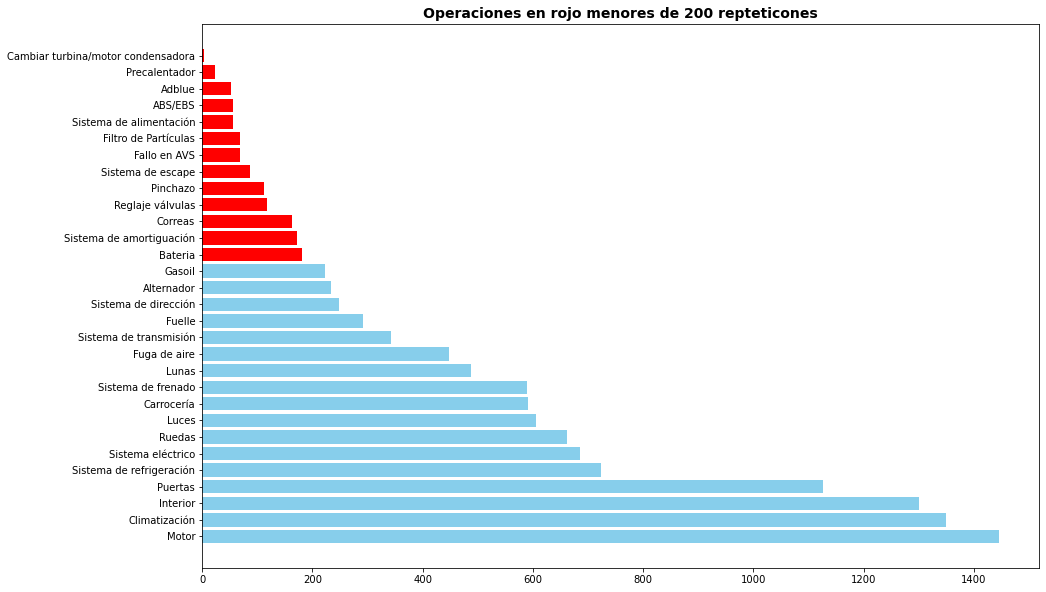

In [27]:
plt.figure(figsize=(15,10))
limite=200

x=df['subarea'].value_counts().index
y=df['subarea'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Operaciones en rojo menores de %d repteticones" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

print('Observaciones: '+str(df.shape[0])+'\n'+ 'Atributos: '+str(df.shape[1]))


In [28]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,10287,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
1,10593,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior,TONI
2,10594,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,11378,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,11626,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,Sin asignar,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-25,1.0,True,1.0,Lunas,JULIAN
12512,9387,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
12513,9615,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
12514,11764,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


In [29]:
df.columns

Index(['index', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fecha_ent', 'ndias_ant_subarea', 'capacidad', 'marca',
       'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'fecha_ant', 'dias', 'match', 'dias_ant',
       'subarea_ant', 'aliasemp_ant'],
      dtype='object')

In [30]:


features=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','ndias_ant_subarea']

df=df[features]

In [31]:
round(df.isna().sum() * 100 / len(df),2)

v_codigbus           0.00
v_edad               0.00
aliasemp             0.00
aliasemp_ant         1.82
dispositivo          0.00
capacidad            0.00
marca                0.10
modelo               0.10
longitud             4.44
tara                 4.44
cilindrada           4.44
potencia             4.44
tipo                 0.99
subtipo              0.14
subarea              0.00
subarea_ant          1.82
dias_ant             2.59
ndias_ant_subarea    8.68
dtype: float64

In [32]:
df=df.dropna()
df.reset_index(drop = True, inplace = True)

print('Columnas: '+str(df.shape[0])+'\nFilas: '+str(df.shape[1]))

Columnas: 10621
Filas: 18


to_show=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','fecha_ent']
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

In [33]:
df['dias_ant'] = df['dias_ant'].astype(np.int64)
df['capacidad'] = df['capacidad'].astype(np.int64)
df['potencia'] = df['potencia'].astype(np.int64)
df['ndias_ant_subarea'] = df['ndias_ant_subarea'].astype(np.int64)
df.dtypes



v_codigbus            object
v_edad                 int64
aliasemp              object
aliasemp_ant          object
dispositivo           object
capacidad              int64
marca                 object
modelo                object
longitud             float64
tara                 float64
cilindrada           float64
potencia               int64
tipo                  object
subtipo               object
subarea               object
subarea_ant           object
dias_ant               int64
ndias_ant_subarea      int64
dtype: object

In [34]:
df['aliasemp'].value_counts().index

Index(['Sin asignar', 'BERMEJO', 'CARABAÑA', 'ALEJANDRO', 'RODRIGUEZ',
       'DEL REY', 'CESAR GOMEZ', 'SERAFIN', 'GUILLERMO', 'MIÑANA', 'FERNANDO',
       'JULIAN', 'RICARDO', 'FONT', 'LLORENTE', 'ESTEVE', 'ALFONSO', 'IÑAKI',
       'FELIX', 'SORIANO (ONT.)', 'JAVI', 'ESCRIBANO', 'MARTINEZ', 'RUFFINO',
       'ALBIACH', 'DAVID', 'JUAN ANTONIO', 'CAFFARENA', 'PAQUITO', 'RUBEN',
       'NAVARRO', 'SERGIO', 'ADRIAN', 'LAZARO', 'GALVEZ', 'IVAN', 'YEVHEN',
       'ARRESE', 'EFRAIN', 'MOYA', 'MIGUEL AG', 'TONI', 'FRAN', 'MARIA ISABEL',
       'ALABAU', 'JUAN CARLOS', 'CALIXTO', 'CESAR', 'SOLANA', 'FELIPE',
       'BUENO', 'JOAN', 'RAMON'],
      dtype='object')

In [35]:
df['aliasemp'].value_counts()

Sin asignar       2423
BERMEJO            979
CARABAÑA           829
ALEJANDRO          782
RODRIGUEZ          750
DEL REY            599
CESAR GOMEZ        557
SERAFIN            464
GUILLERMO          320
MIÑANA             295
FERNANDO           285
JULIAN             269
RICARDO            254
FONT               251
LLORENTE           188
ESTEVE             188
ALFONSO            144
IÑAKI              140
FELIX              132
SORIANO (ONT.)      97
JAVI                89
ESCRIBANO           84
MARTINEZ            78
RUFFINO             73
ALBIACH             62
DAVID               43
JUAN ANTONIO        38
CAFFARENA           36
PAQUITO             34
RUBEN               27
NAVARRO             25
SERGIO              19
ADRIAN              10
LAZARO               9
GALVEZ               7
IVAN                 7
YEVHEN               5
ARRESE               5
EFRAIN               3
MOYA                 3
MIGUEL AG            2
TONI                 2
FRAN                 2
MARIA ISABE

<BarContainer object of 53 artists>

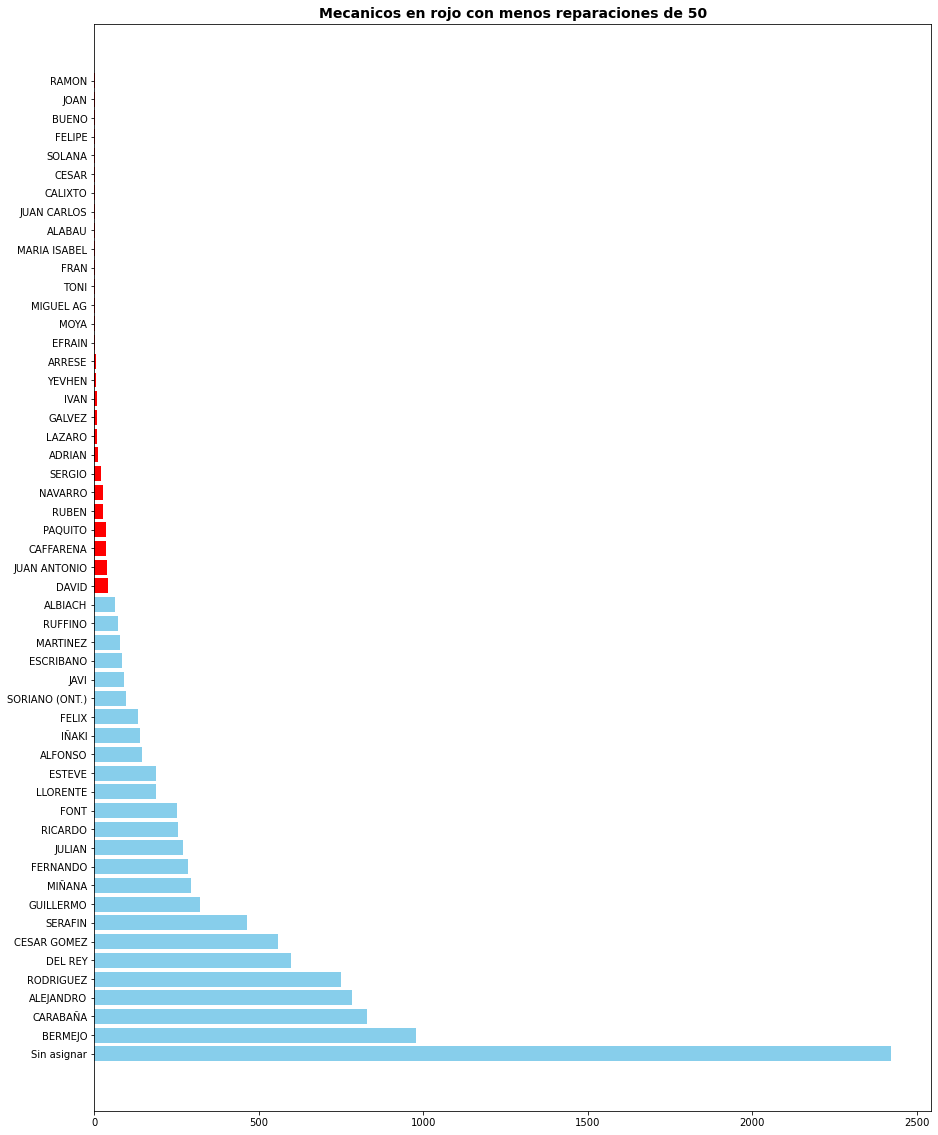

In [36]:
plt.figure(figsize=(15,20))
limite=50

x=df['aliasemp'].value_counts().index
y=df['aliasemp'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [37]:
df.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea'],
      dtype='object')

In [38]:
df.dtypes

v_codigbus            object
v_edad                 int64
aliasemp              object
aliasemp_ant          object
dispositivo           object
capacidad              int64
marca                 object
modelo                object
longitud             float64
tara                 float64
cilindrada           float64
potencia               int64
tipo                  object
subtipo               object
subarea               object
subarea_ant           object
dias_ant               int64
ndias_ant_subarea      int64
dtype: object

In [39]:
target='Motor'
df['target'] = np.where((df['subarea'].str.contains(target)),1,0)


# separa dataset

In [40]:
df_motor=df[df['target']==1]


In [41]:
df_motor.reset_index(drop = True, inplace = True)

In [42]:
df_motor.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea', 'target'],
      dtype='object')

In [43]:
import category_encoders as ce
df_cat=df_motor.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['v_codigbus','dispositivo','aliasemp','aliasemp_ant', 'subarea','subarea_ant', 'marca','modelo','tipo','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant
0,1,1,1,1,1,1,1,1,1,1
1,1,2,2,1,1,1,1,1,1,2
2,2,3,3,1,2,2,1,2,1,1
3,2,4,4,1,2,2,1,2,1,3
4,3,4,2,1,3,3,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1290,147,12,4,2,6,21,1,2,1,6
1291,147,10,13,2,6,21,1,2,1,5
1292,147,10,10,2,6,21,1,2,1,5
1293,147,12,13,2,6,21,1,2,1,27


In [44]:
df_motor.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea', 'target'],
      dtype='object')

In [45]:
df_num=df_motor.select_dtypes(include=np.number)
cols_num=df_num.drop(columns=['dias_ant','ndias_ant_subarea','target']).columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num.drop(columns=['dias_ant','ndias_ant_subarea','target']))
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df[['dias_ant','ndias_ant_subarea','target']]=df_num[['dias_ant','ndias_ant_subarea','target']]

df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df['target']=df_num['ndias_ant']

In [46]:
df_num

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,15,55,12.00,12972.0,10640.0,280,27,577,1
1,15,55,12.00,12972.0,10640.0,280,42,116,1
2,13,35,8.39,8340.0,6871.0,176,108,581,1
3,13,35,8.39,8340.0,6871.0,176,35,35,1
4,16,53,12.80,13421.0,12130.0,309,51,232,1
...,...,...,...,...,...,...,...,...,...
1290,5,39,9.90,11470.0,6700.0,226,23,79,1
1291,5,39,9.90,11470.0,6700.0,226,39,39,1
1292,5,39,9.90,11470.0,6700.0,226,39,39,1
1293,5,39,9.90,11470.0,6700.0,226,4,46,1


In [47]:
scaled_df

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27,577,1
1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42,116,1
2,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108,581,1
3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35,35,1
4,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51,232,1
...,...,...,...,...,...,...,...,...,...
1290,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23,79,1
1291,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1292,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1293,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4,46,1


In [48]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(1295, 19)

In [49]:
df_norm

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,1,1,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27,577,1
1,1,2,2,1,1,1,1,1,1,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42,116,1
2,2,3,3,1,2,2,1,2,1,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108,581,1
3,2,4,4,1,2,2,1,2,1,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35,35,1
4,3,4,2,1,3,3,1,1,1,2,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51,232,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,147,12,4,2,6,21,1,2,1,6,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23,79,1
1291,147,10,13,2,6,21,1,2,1,5,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1292,147,10,10,2,6,21,1,2,1,5,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1293,147,12,13,2,6,21,1,2,1,27,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4,46,1


(array([0]), [Text(0, 0, '0')])

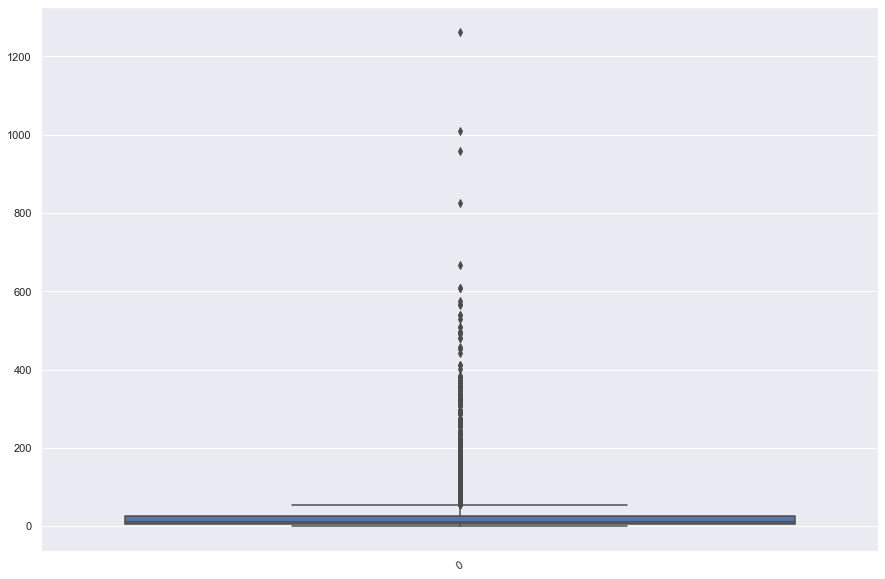

In [50]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df['dias_ant'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'v_codigbus'),
  Text(1, 0, 'aliasemp'),
  Text(2, 0, 'aliasemp_ant'),
  Text(3, 0, 'dispositivo'),
  Text(4, 0, 'marca'),
  Text(5, 0, 'modelo'),
  Text(6, 0, 'tipo'),
  Text(7, 0, 'subtipo'),
  Text(8, 0, 'subarea'),
  Text(9, 0, 'subarea_ant')])

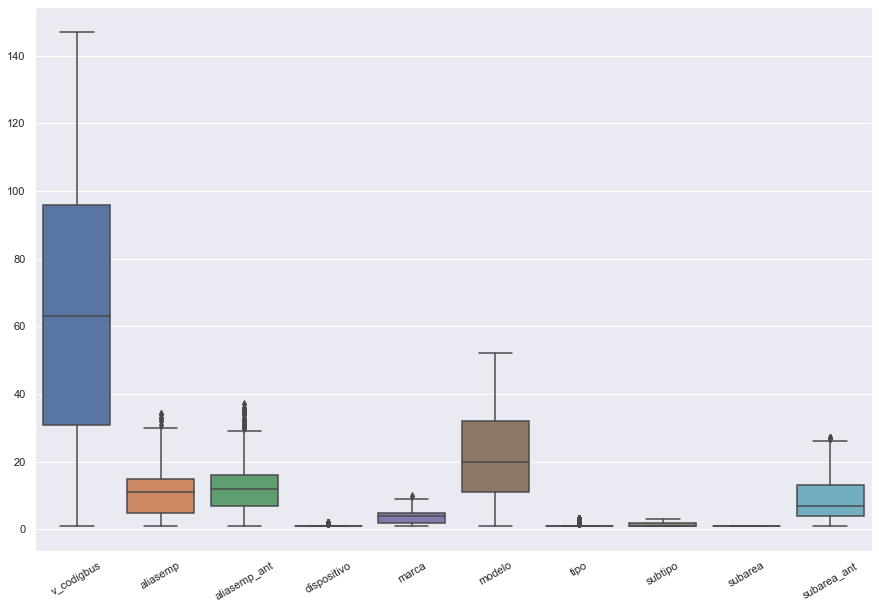

In [51]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df_enc)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'v_edad'),
  Text(1, 0, 'capacidad'),
  Text(2, 0, 'longitud'),
  Text(3, 0, 'tara'),
  Text(4, 0, 'cilindrada'),
  Text(5, 0, 'potencia')])

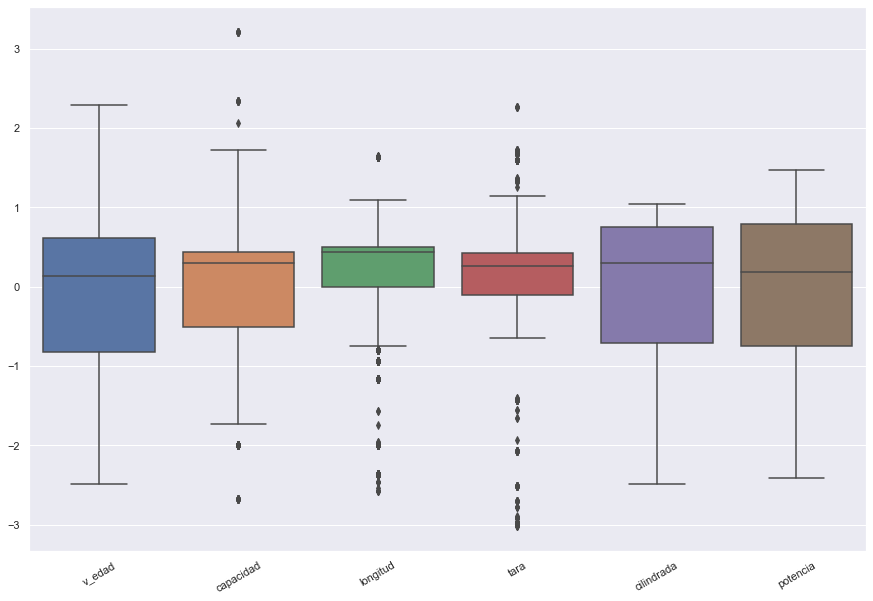

In [52]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=scaled_df.drop(columns=['dias_ant','ndias_ant_subarea','target']))
plt.xticks(rotation=30)

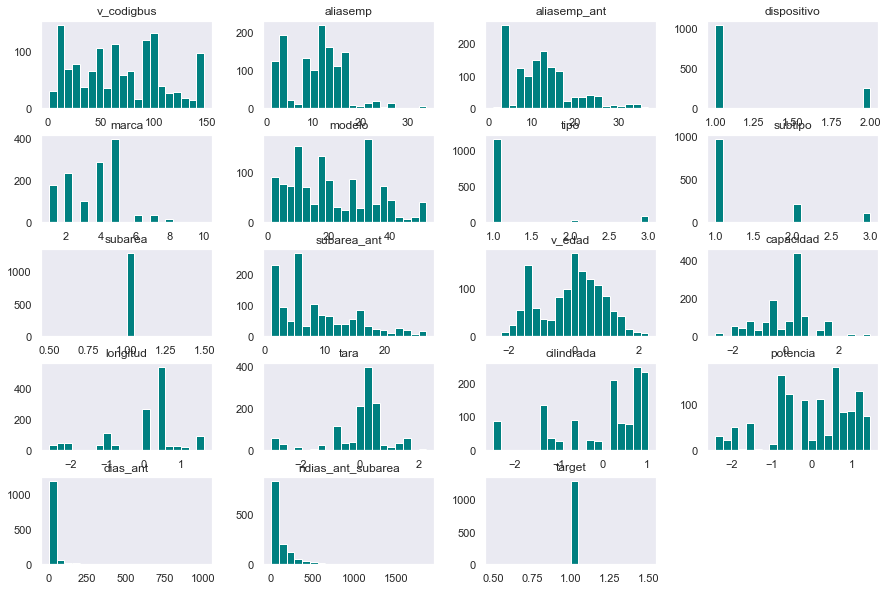

In [53]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

In [54]:
df_subarea_ant = pd.DataFrame({'subarea_ant':pd.unique(df_motor.subarea_ant), 'codigo':pd.unique(df_norm.subarea_ant)})

df_subarea_ant

,subarea_ant,codigo
0,Fuga de aire,1
1,Climatización,2
2,Puertas,3
3,Luces,4
4,Motor,5
5,Sistema de dirección,6
6,Sistema de transmisión,7
7,Sistema de refrigeración,8
8,Gasoil,9
9,Ruedas,10


In [55]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df_motor.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,61HC,1
1,73HC,2
2,77HC,3
3,ACV0204,4
4,ACV0271,5
...,...,...
142,X114,143
143,X115,144
144,X116,145
145,X117,146


In [56]:

df_aliasemp = pd.DataFrame({'aliasemp':pd.unique(df_motor.aliasemp), 'codigo':pd.unique(df_norm.aliasemp)})
df_aliasemp

,aliasemp,codigo
0,ALEJANDRO,1
1,TONI,2
2,Sin asignar,3
3,YEVHEN,4
4,FELIX,5
5,CAFFARENA,6
6,ALFONSO,7
7,RODRIGUEZ,8
8,ESTEVE,9
9,RICARDO,10


In [57]:
df_marca = pd.DataFrame({'Marca':pd.unique(df_motor.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,SCANIA,1
1,MERCEDES BENZ,2
2,VOLVO,3
3,IVECO,4
4,MAN,5
5,CUMMINS,6
6,DAF,7
7,IVECO/FIAT,8
8,RENAULT,9
9,FIAT,10


In [58]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df_motor.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,CENTURY,1
1,OPALIN,2
2,DIVO,3
3,SIDERAL,4
4,TOURING III,5
5,DIVO II,6
6,AURA,7
7,TOURING,8
8,TOURING INTERCITY,9
9,Pb,10


In [59]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df_motor.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Discrecional,1
1,Interurbano,2
2,Urbano,3


In [60]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df_motor.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1
1,Midibus,2
2,Microbus,3


In [61]:
df_motor['subtipo'].value_counts()

Normal      970
Midibus     215
Microbus    110
Name: subtipo, dtype: int64

<BarContainer object of 3 artists>

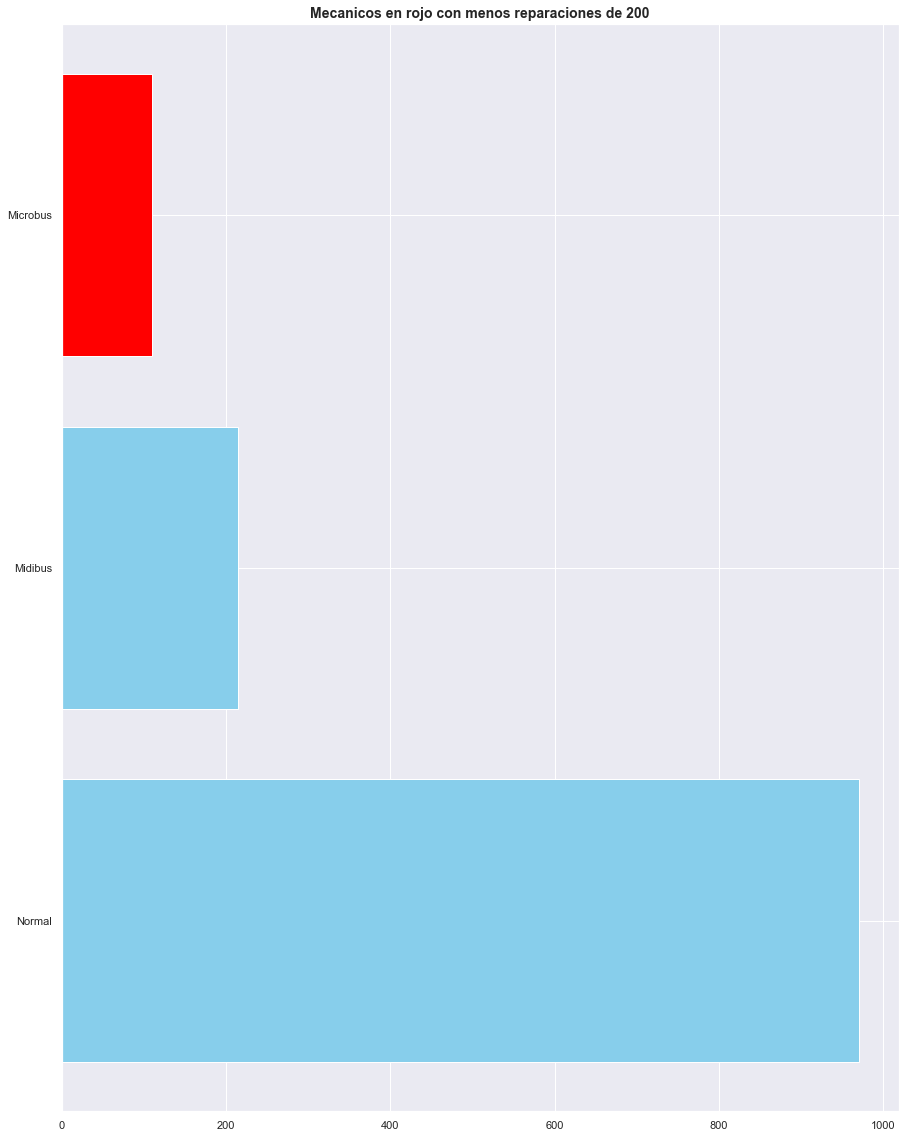

In [62]:
plt.figure(figsize=(15,20))
limite=200

x=df_motor['subtipo'].value_counts().index
y=df_motor['subtipo'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

In [63]:
df_norm=df_norm.drop(['subarea','aliasemp','target'],axis=1)

<AxesSubplot:>

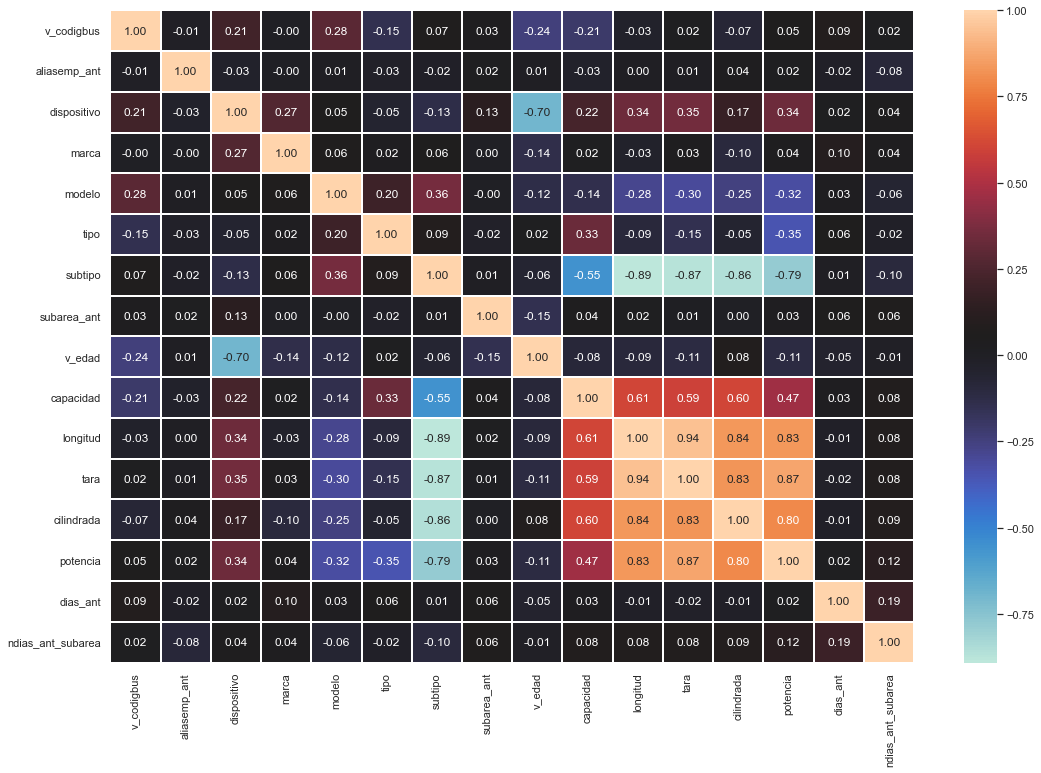

In [64]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Feature selector

In [65]:
df_norm

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea
0,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27,577
1,1,2,1,1,1,1,1,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42,116
2,2,3,1,2,2,1,2,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108,581
3,2,4,1,2,2,1,2,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35,35
4,3,2,1,3,3,1,1,2,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,147,4,2,6,21,1,2,6,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23,79
1291,147,13,2,6,21,1,2,5,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39
1292,147,10,2,6,21,1,2,5,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39
1293,147,13,2,6,21,1,2,27,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4,46


In [66]:
train_labels=df_norm['ndias_ant_subarea']
train=df_norm.drop(columns = 'ndias_ant_subarea')

In [67]:
fs = FeatureSelector(data = train, labels = train_labels)


In [68]:
train_labels

0       577
1       116
2       581
3        35
4       232
       ... 
1290     79
1291     39
1292     39
1293     46
1294     40
Name: ndias_ant_subarea, Length: 1295, dtype: int64

## Missing Values

In [69]:

fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [70]:
missing_features = fs.ops['missing']
missing_features[:10]


[]

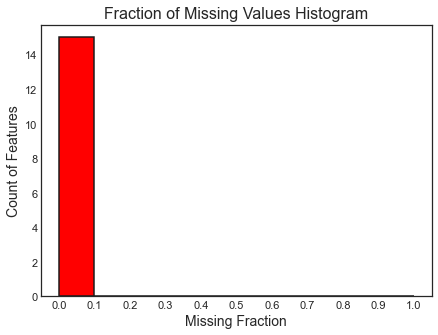

In [71]:
fs.plot_missing()

## Single Unique Value

In [72]:
fs.identify_single_unique()

0 features with a single unique value.



In [73]:
single_unique = fs.ops['single_unique']
single_unique

[]

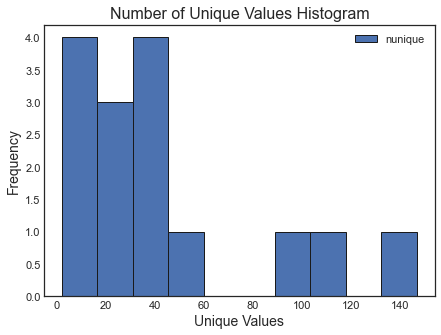

In [74]:
fs.plot_unique()

In [75]:
fs.unique_stats.sample(5)


,nunique
tipo,3
cilindrada,28
longitud,36
aliasemp_ant,37
v_codigbus,147


## Collinear (highly correlated) Features

In [76]:
fs.identify_collinear(correlation_threshold=0.80)

4 features with a correlation magnitude greater than 0.80.



In [77]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['longitud', 'tara', 'cilindrada', 'potencia']

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'longitud'), Text(0, 1.5, 'tara'), Text(0, 2.5, 'subtipo')])

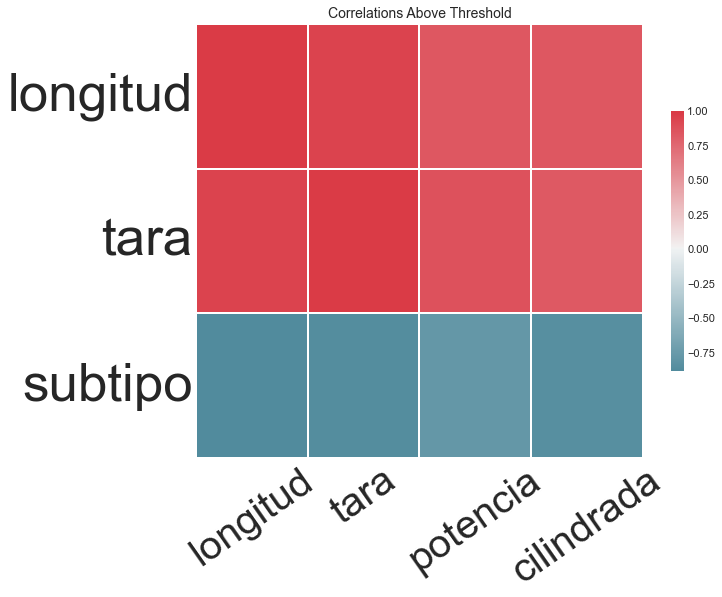

In [78]:
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)



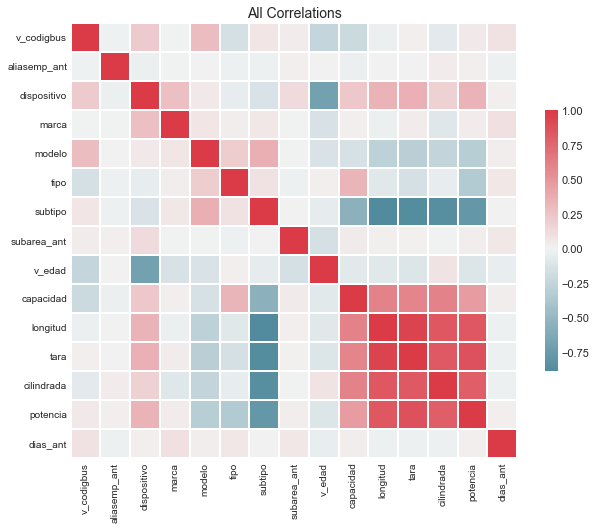

In [79]:
fs.plot_collinear(plot_all=True)

4 features with a correlation magnitude greater than 0.80.



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'longitud'), Text(0, 1.5, 'tara'), Text(0, 2.5, 'subtipo')])

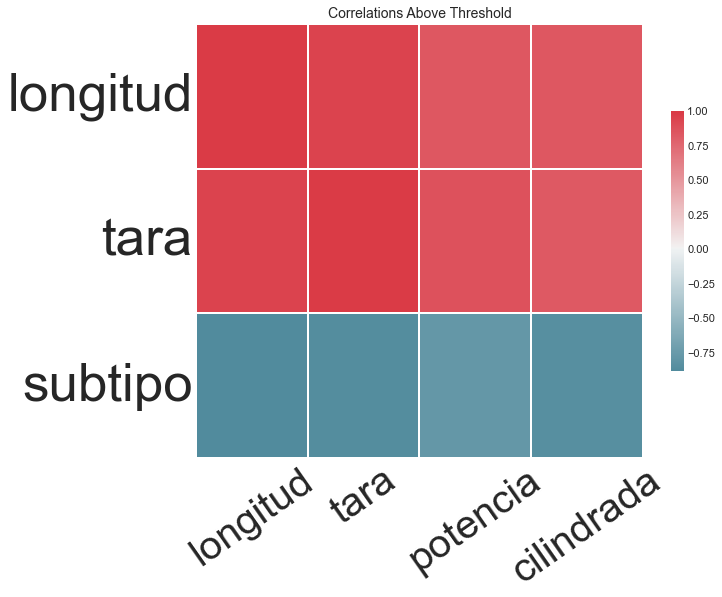

In [80]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)

In [81]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,longitud,subtipo,-0.891075
1,tara,subtipo,-0.871875
2,tara,longitud,0.942037
3,cilindrada,subtipo,-0.860073
4,cilindrada,longitud,0.835853


## Zero Importance Features

In [82]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



In [83]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))


There are 15 original features
There are 0 one-hot features


In [84]:
fs.data_all.head(10)

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27
1,1,2,1,1,1,1,1,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42
2,2,3,1,2,2,1,2,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108
3,2,4,1,2,2,1,2,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35
4,3,2,1,3,3,1,1,2,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51
5,4,5,1,4,4,1,1,4,1.090187,0.436910,0.533025,0.245527,0.168190,0.774649,265
6,5,4,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,20
7,5,6,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,3
8,5,4,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,16
9,6,6,1,3,6,1,1,2,0.851547,0.436910,0.433615,0.465539,0.804045,0.663813,75


In [85]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

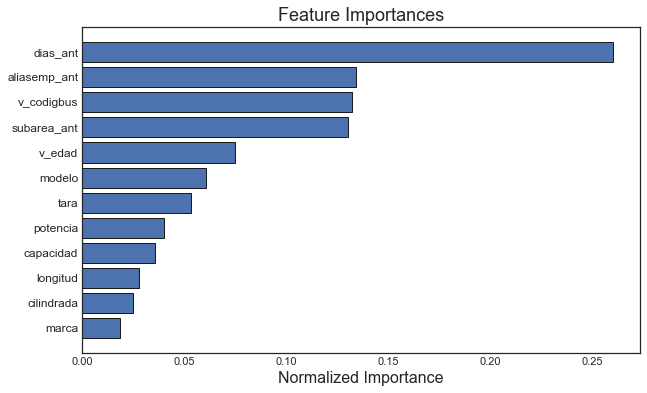

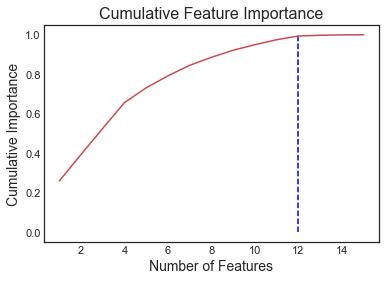

12 features required for 0.99 of cumulative importance


In [86]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [87]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,dias_ant,7805.0,0.260167,0.260167
1,aliasemp_ant,4026.0,0.134200,0.394367
2,v_codigbus,3962.0,0.132067,0.526433
3,subarea_ant,3913.0,0.130433,0.656867
4,v_edad,2243.0,0.074767,0.731633
5,modelo,1819.0,0.060633,0.792267
6,tara,1597.0,0.053233,0.845500
7,potencia,1213.0,0.040433,0.885933
8,capacidad,1077.0,0.035900,0.921833
9,longitud,834.0,0.027800,0.949633


In [88]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)


15

## Low Importance Features


In [89]:
fs.identify_low_importance(cumulative_importance = 0.99)

11 features required for cumulative importance of 0.99 after one hot encoding.
4 features do not contribute to cumulative importance of 0.99.



In [90]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['marca', 'tipo', 'subtipo', 'dispositivo']

## Removing Features

In [91]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [92]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 0 features.


In [93]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 8 features identified for removal


[]

In [94]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 8 features.


## Handling One-Hot Features

In [95]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)


['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 8 features including one-hot features.


In [96]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 15
Final Number of Features:  7


In [97]:
train_removed_all

,v_codigbus,aliasemp_ant,modelo,subarea_ant,v_edad,capacidad,dias_ant
0,1,1,1,1,1.090187,0.436910,27
1,1,2,1,2,1.090187,0.436910,42
2,2,3,2,1,0.612908,-0.917323,108
3,2,4,2,3,0.612908,-0.917323,35
4,3,2,3,2,1.328826,0.301487,51
...,...,...,...,...,...,...,...
1290,147,4,21,6,-1.296209,-0.646476,23
1291,147,13,21,5,-1.296209,-0.646476,39
1292,147,10,21,5,-1.296209,-0.646476,39
1293,147,13,21,27,-1.296209,-0.646476,4


### Analisis de componentes principales

features_t1=['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca',
       'modelo', 'tipo', 'subtipo', 'subarea_ant', 'v_edad',
       'capacidad', 'longitud', 'tara', 'cilindrada', 'potencia', 'dias_ant',
       'ndias_ant_subarea']
df_norm=df_target1[features_t1]
df_norm.reset_index(drop = True, inplace = True)


In [98]:
df_feat = np.transpose(train_removed_all)
#df_feat=df_feat.drop('target', 0)
names =  df_feat.index
names

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant'],
      dtype='object')

In [99]:
len(names)

7

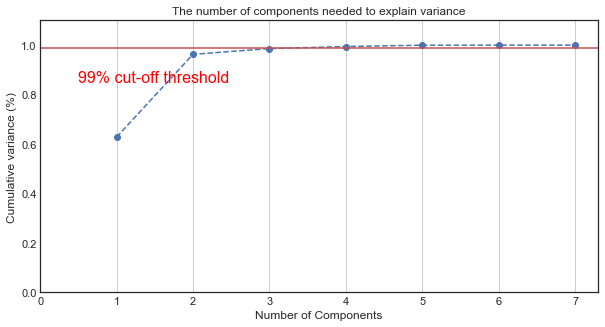

In [100]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.73223485 0.12301045]


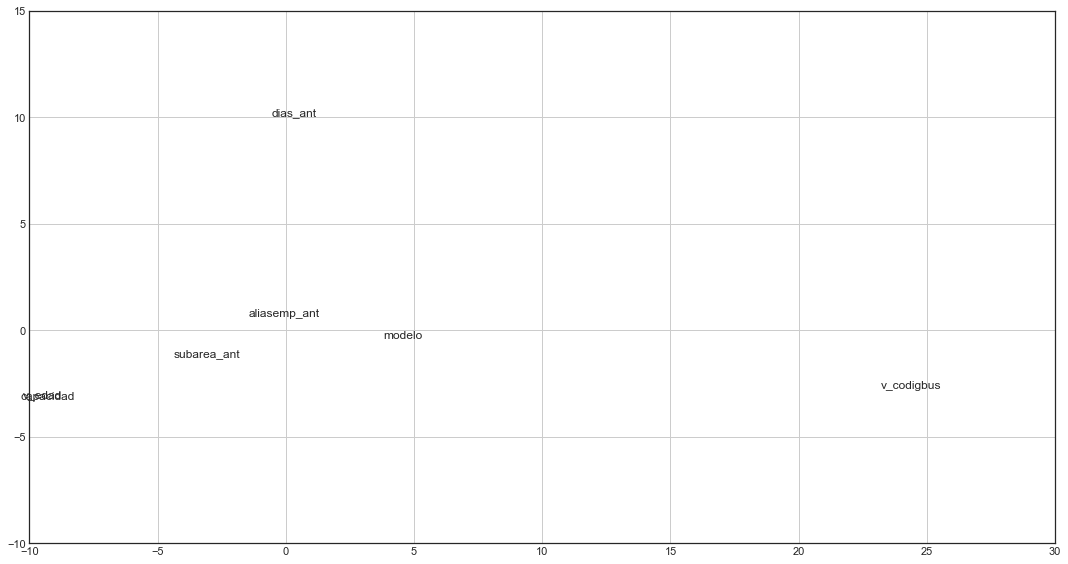

In [101]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components =2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-10, 30)
plt.ylim(-10, 15)
ax.grid(True)
fig.tight_layout()
plt.show()

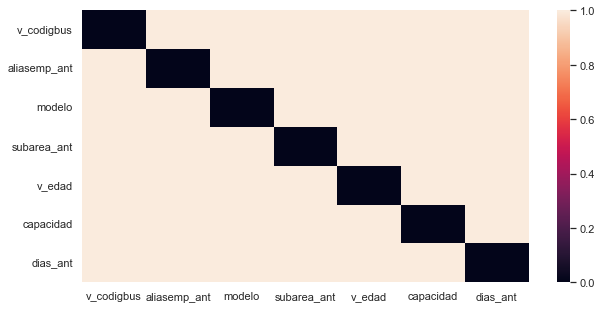

In [102]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

C:\Users\Dani\AppData\Local\Temp/ipykernel_9128/3741172497.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


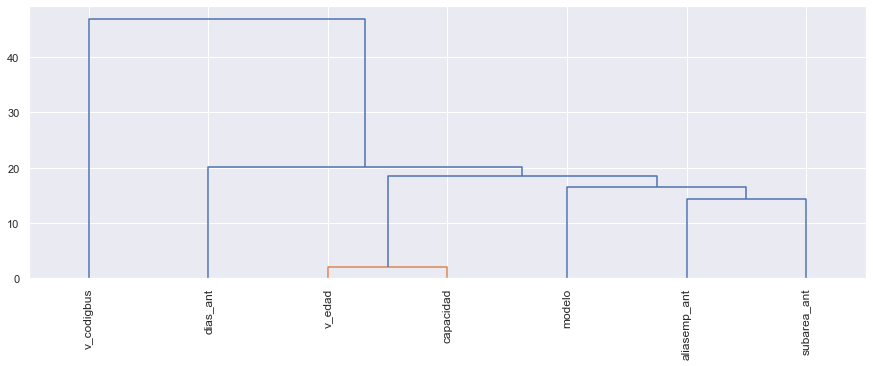

In [103]:


clusters = cluster.hierarchy.linkage(matdist, method = 'single')

plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

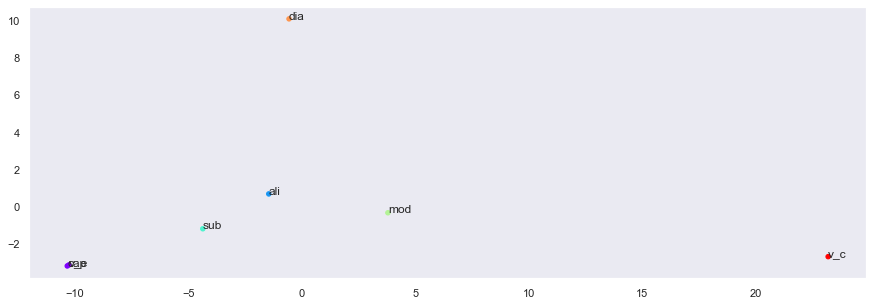

In [104]:
cut = 3 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 


plt.grid()
plt.show()

In [105]:
df_norm.columns

Index(['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca', 'modelo', 'tipo',
       'subtipo', 'subarea_ant', 'v_edad', 'capacidad', 'longitud', 'tara',
       'cilindrada', 'potencia', 'dias_ant', 'ndias_ant_subarea'],
      dtype='object')

# Reduccionde variables PCA

In [106]:
names = train_removed_all.columns
len(names)

7

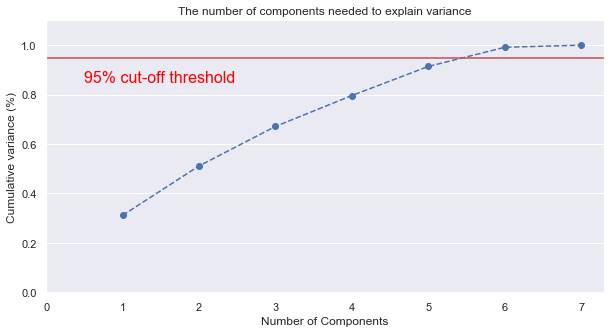

In [107]:
#names=df_norm['target']
#names2=df_norm['subtipo']

from sklearn.decomposition import PCA
min_max_scaler = preprocessing.MinMaxScaler()
#features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))
features_norm = min_max_scaler.fit_transform(train_removed_all)
pca = PCA().fit(features_norm)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [108]:
#names=df_norm['target']
names2=df_norm['subtipo']

C:\Users\Dani\AppData\Local\Temp/ipykernel_9128/1304537208.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('ndias_ant_subarea', 1))


Variance Ratio: 


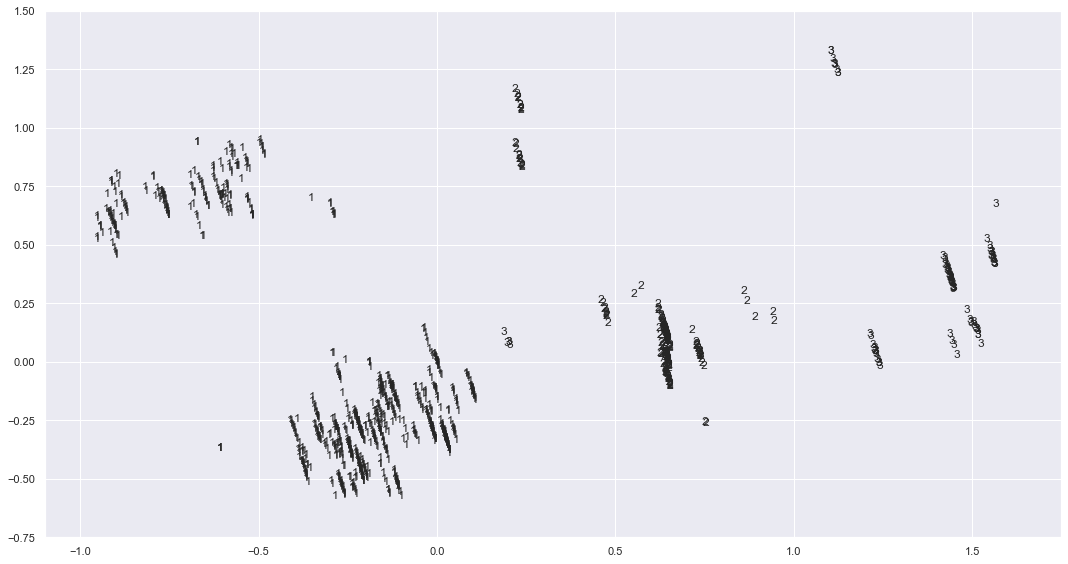

In [109]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('ndias_ant_subarea', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 9)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ")#, estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names2[i]) 


plt.xlim(-1.1, 1.75)
plt.ylim(-0.75, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3207106280967586
For n_clusters = 3 The average silhouette_score is : 0.3581280015694073
For n_clusters = 4 The average silhouette_score is : 0.35928182852922297
For n_clusters = 5 The average silhouette_score is : 0.3416768295545521
For n_clusters = 6 The average silhouette_score is : 0.26365524132571494


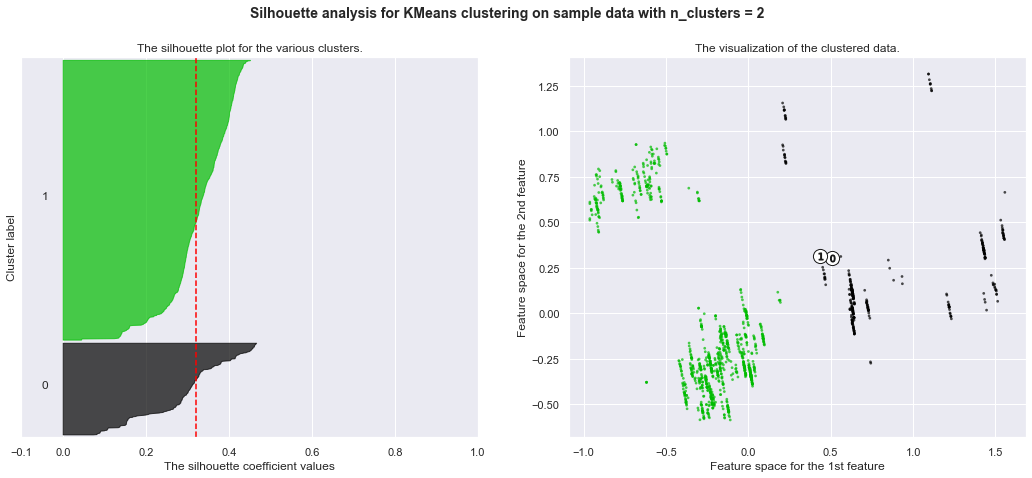

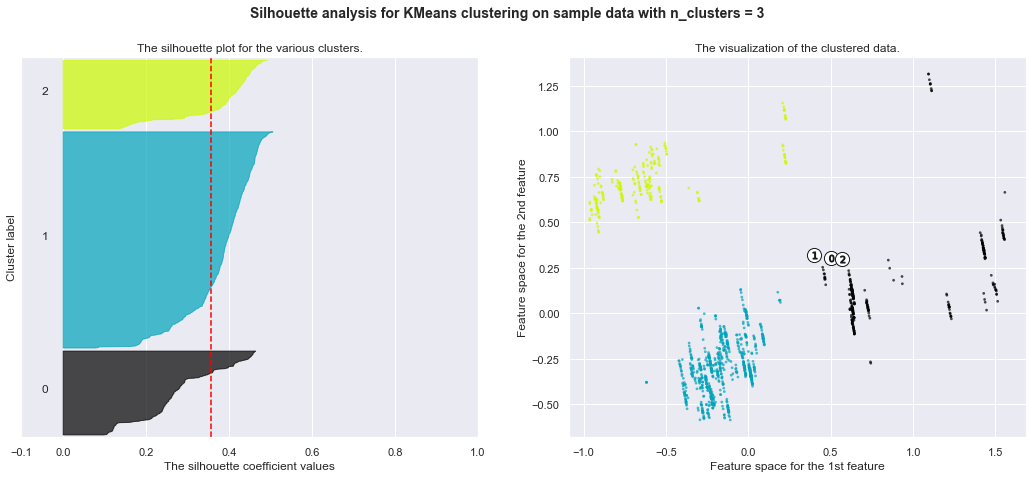

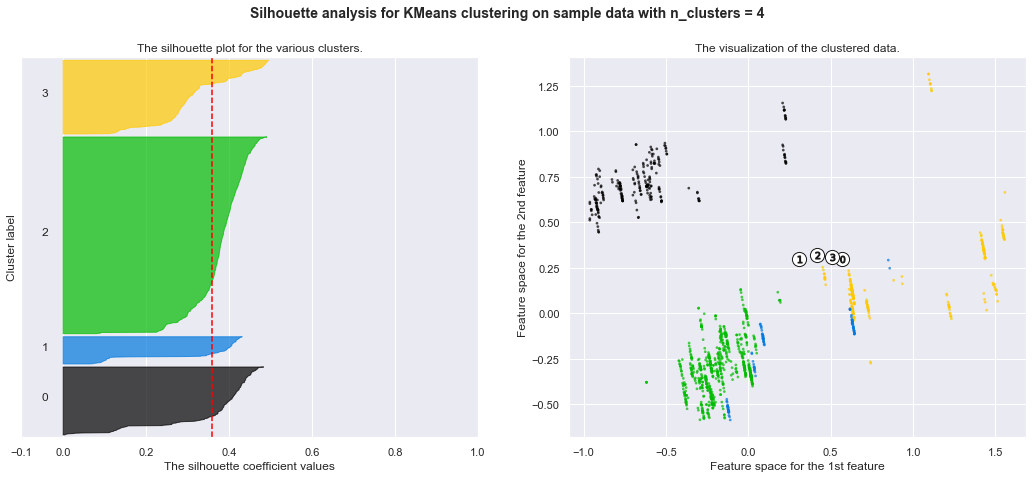

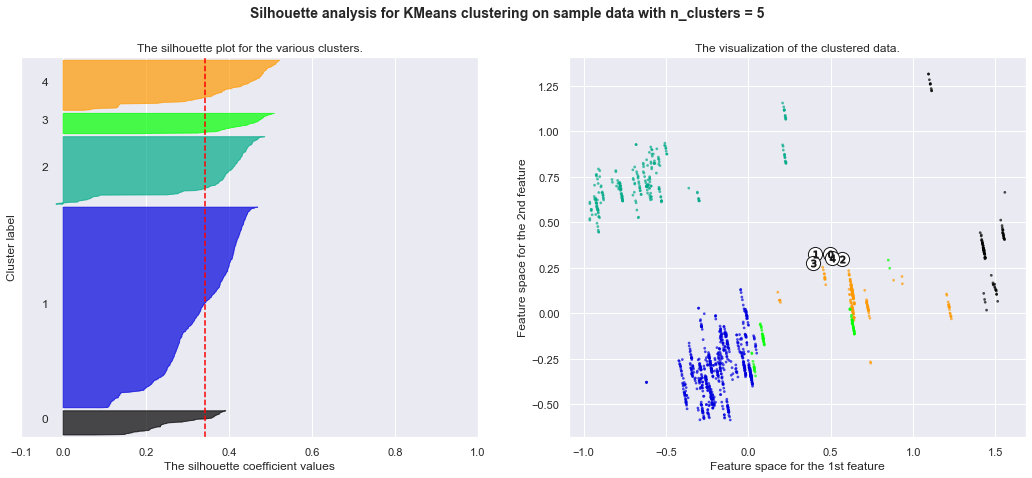

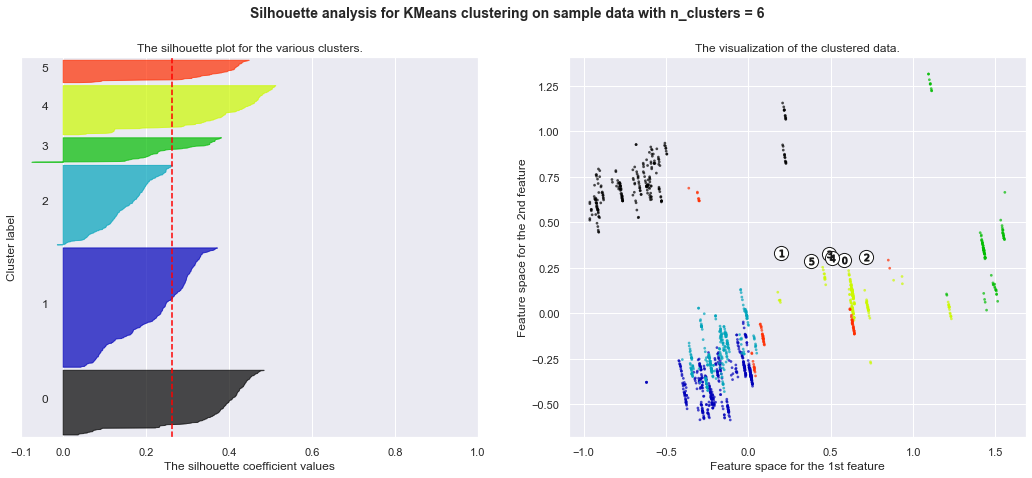

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

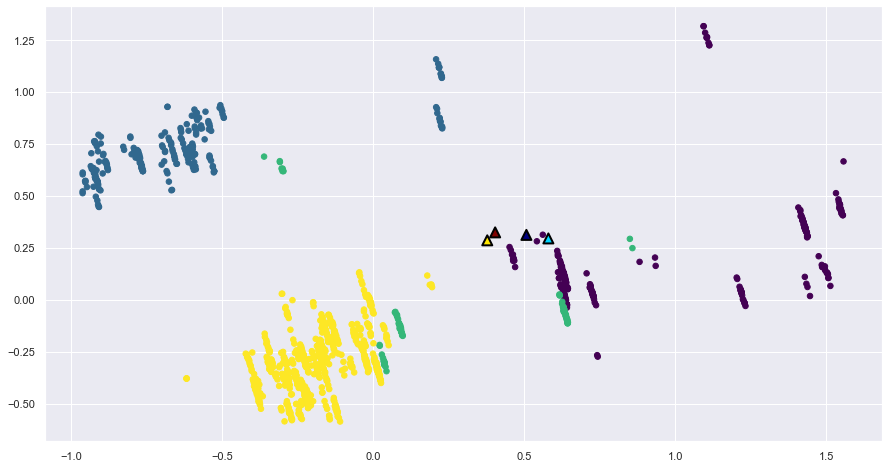

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1,2,3],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")

In [112]:
train_removed_all['Kmeans_cluster']= labels
train_removed_all['ndias_ant_subarea']= train_labels

<AxesSubplot:>

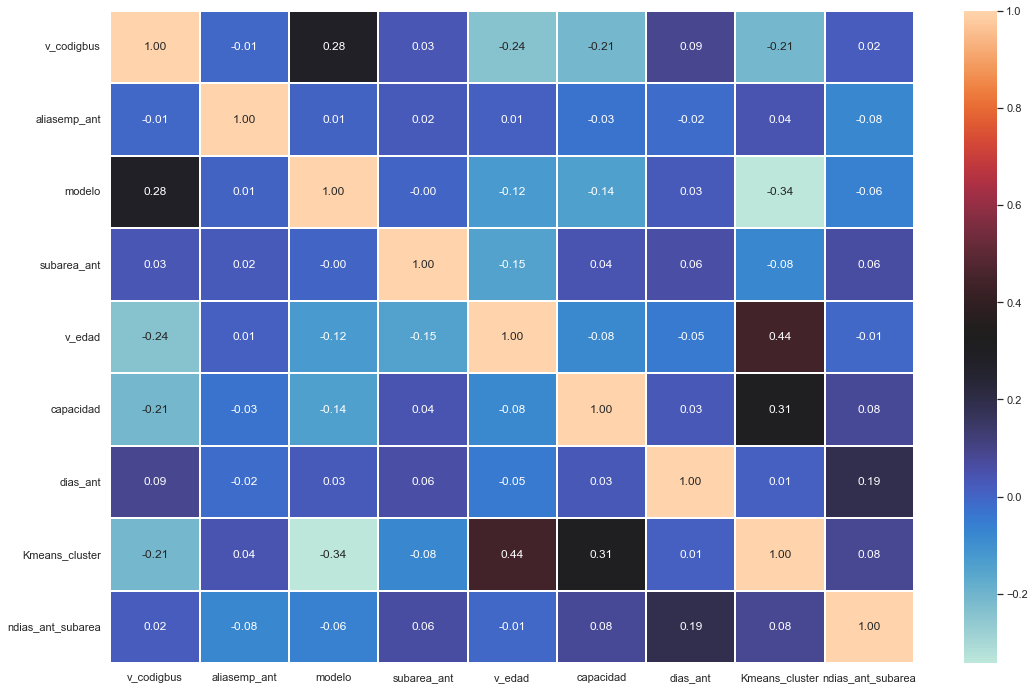

In [113]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(train_removed_all.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones.png')

In [114]:
train_removed_all.columns

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'Kmeans_cluster', 'ndias_ant_subarea'],
      dtype='object')

In [115]:

features=['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'Kmeans_cluster', 'ndias_ant_subarea']
            
new_df=train_removed_all[features]


<AxesSubplot:>

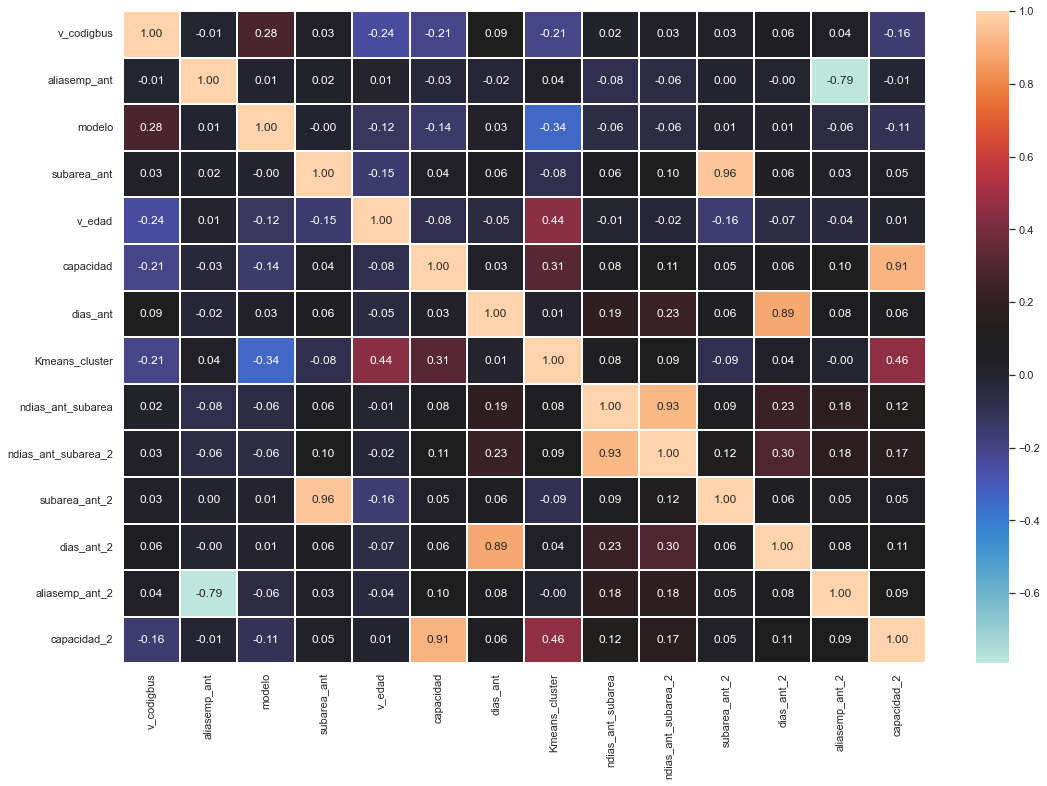

In [116]:
#Transformaciones
import math


new_df['ndias_ant_subarea_2']=np.sqrt((new_df['ndias_ant_subarea']))
new_df['subarea_ant_2']=((new_df['subarea_ant'])**2)
new_df['dias_ant_2']=np.sqrt((new_df['dias_ant']))
new_df['aliasemp_ant_2']=1/((new_df['aliasemp_ant']))
new_df['capacidad_2']=np.cbrt((new_df['capacidad']))




f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(new_df.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones2.png')

In [117]:
round(new_df.isna().sum() * 100 / len(new_df),2)

v_codigbus             0.0
aliasemp_ant           0.0
modelo                 0.0
subarea_ant            0.0
v_edad                 0.0
capacidad              0.0
dias_ant               0.0
Kmeans_cluster         0.0
ndias_ant_subarea      0.0
ndias_ant_subarea_2    0.0
subarea_ant_2          0.0
dias_ant_2             0.0
aliasemp_ant_2         0.0
capacidad_2            0.0
dtype: float64

In [118]:
new_df.columns

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'Kmeans_cluster', 'ndias_ant_subarea',
       'ndias_ant_subarea_2', 'subarea_ant_2', 'dias_ant_2', 'aliasemp_ant_2',
       'capacidad_2'],
      dtype='object')

In [119]:
features_ndf=['v_codigbus', 'modelo', 'v_edad','Kmeans_cluster','subarea_ant_2', 
              'dias_ant_2', 'aliasemp_ant_2','capacidad_2','ndias_ant_subarea_2']

newdf=new_df[features_ndf]

In [120]:

X_train, X_test, y_train, y_test = train_test_split(
                                        newdf.drop(columns = 'ndias_ant_subarea_2'),
                                        newdf['ndias_ant_subarea_2'],
                                        test_size=0.25,
                                        random_state = 123
                                    )



# Modelado

In [121]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer,accuracy_score, mean_absolute_error, mean_squared_error,r2_score

#‘neg_mean_absolute_error’
#‘neg_mean_squared_error’
#‘neg_root_mean_squared_error’

## Iteraciones

In [122]:
iteraciones=10

# LinearRegression

In [123]:
features_LR=['dias_ant_2', 'aliasemp_ant_2','capacidad_2']
X_train_LR=X_train[features_LR]
X_test_LR=X_test[features_LR]

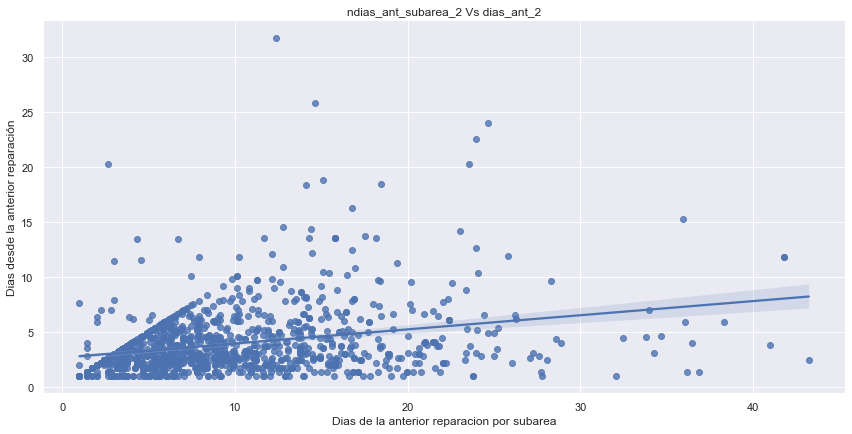

In [124]:
sns.lmplot(x='ndias_ant_subarea_2',y='dias_ant_2',data=newdf,aspect=2,height=6)
plt.xlabel('Dias de la anterior reparacion por subarea')
plt.ylabel('Dias desde la anterior reparación')
plt.title('ndias_ant_subarea_2 Vs dias_ant_2');

### parametros

In [125]:
parameters_LR={'fit_intercept':[True],
               'normalize':[True,False],
               'copy_X':[True],
               'n_jobs':[-1],
               'positive':[False]
            }

In [126]:
LR=LinearRegression()
ran_LR=RandomizedSearchCV(LR,parameters_LR,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_LR.fit(X_train,y_train)

C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True], 'n_jobs': [-1],
                                        'normalize': [True, False],
                                        'positive': [False]},
                   random_state=0, scoring='neg_mean_absolute_error',
                   verbose=1)

In [127]:
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))
print("CV score=%0.3f" % ran_LR.best_score_)
cv_results_LR = ran_LR.cv_results_

Best parameters from Randomsearch: {'positive': False, 'normalize': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
CV score=-4.562


In [128]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))

print('\nLinearRegression \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_LR.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_LR.best_params_
LR_ran = LinearRegression(fit_intercept= model['fit_intercept'],
                          normalize=model['normalize'],
                          copy_X=model['copy_X'],
                          n_jobs=-1,
                          positive=model['positive']
                                )



#Predicción
LR_ran.fit(X_train,y_train)
y_pred = LR_ran.predict(X_test)
mae_LR = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_LR)

r2_LR=r2_score((y_test), (y_pred))#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_LR+'\n')


print('LinearRegression \n')
#print(r2_score(y_test, y_pred))
print('\n')

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
#theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X_train.columns.values)
#parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

sk_theta = [LR_ran.intercept_]+list(LR_ran.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(parameter_df)




mse_LR = mean_squared_error(y_pred, y_test)

# R_square
R_square_LR = LR_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_LR)
print('\nR square obtain for scikit learn library is :',R_square_LR)

#importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': LR_ran.feature_importances_})

#print('Importancia LinearRegression:\n ',importancia)
#print('\n')
#plt.suptitle('Importancia LinearRegression ')
#x=parameter_df.columns
#y=parameter_df.Sklearn_theta
#my_color = np.where(y>=0.1, 'orange', 'skyblue')
#plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_LR = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

MOTOR
RandomSearch

Best parameters from Randomsearch: {'positive': False, 'normalize': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}

LinearRegression 

TRAIN 
Best score MAE=-4.5619


PREDICCIÓN  

MAE prediction:  4.428647440307699
R2 :0.1653

LinearRegression 



  Parameter          Columns  Sklearn_theta
0   theta_0  intersect:x_0=1       5.149989
1   theta_1       v_codigbus       0.006286
2   theta_2           modelo      -0.018668
3   theta_3           v_edad       0.023001
4   theta_4   Kmeans_cluster       0.030144
5   theta_5    subarea_ant_2       0.003108
6   theta_6       dias_ant_2       0.597661
7   theta_7   aliasemp_ant_2       9.630595
8   theta_8      capacidad_2       0.960849

The Mean Square Error(MSE) or J(theta) is:  35.0208167466608

R square obtain for scikit learn library is : 0.16532310508759018


In [129]:
LR=LinearRegression()
ran_LR=RandomizedSearchCV(LR,parameters_LR,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_LR.fit(X_train_LR,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True], 'n_jobs': [-1],
                                        'normalize': [True, False],
                                        'positive': [False]},
                   random_state=0, scoring='neg_mean_absolute_error',
                   verbose=1)

In [130]:
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))
print("CV score=%0.3f" % ran_LR.best_score_)
cv_results_LR = ran_LR.cv_results_

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
CV score=-4.556


In [131]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))

print('\nLinearRegression \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_LR.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_LR.best_params_
LR_ran = LinearRegression(fit_intercept= model['fit_intercept'],
                          normalize=model['normalize'],
                          copy_X=model['copy_X'],
                          n_jobs=-1,
                          positive=model['positive']
                                )



#Predicción
LR_ran.fit(X_train_LR,y_train)
y_pred = LR_ran.predict(X_test_LR)
mae_LR2 = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_LR)

r2_LR2=r2_score((y_test), (y_pred))#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_LR+'\n')


print('LinearRegression \n')
#print(r2_score(y_test, y_pred))
print('\n')

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train_LR]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test_LR]

# Step2: build model
#theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X_train_LR.columns.values)
#parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

sk_theta = [LR_ran.intercept_]+list(LR_ran.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(parameter_df)



# sklearn regression module
y_pred_sk = LR_ran.predict(X_test_LR)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = LR_ran.score(X_test_LR,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('\nR square obtain for scikit learn library is :',R_square_sk)

#importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': LR_ran.feature_importances_})

#print('Importancia LinearRegression:\n ',importancia)
#print('\n')
#plt.suptitle('Importancia LinearRegression ')
#x=X_test.columns
#y=LR_ran.feature_importances_
#my_color = np.where(y>=0.1, 'orange', 'skyblue')
#plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_LR = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

MOTOR
RandomSearch

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}

LinearRegression 

TRAIN 
Best score MAE=-4.5557


PREDICCIÓN  

MAE prediction:  4.428647440307699
R2 :0.1653

LinearRegression 



  Parameter          Columns  Sklearn_theta
0   theta_0  intersect:x_0=1       5.464576
1   theta_1       dias_ant_2       0.613711
2   theta_2   aliasemp_ant_2      10.209576
3   theta_3      capacidad_2       0.993089

The Mean Square Error(MSE) or J(theta) is:  36.000280618528755

R square obtain for scikit learn library is : 0.14197882190985456


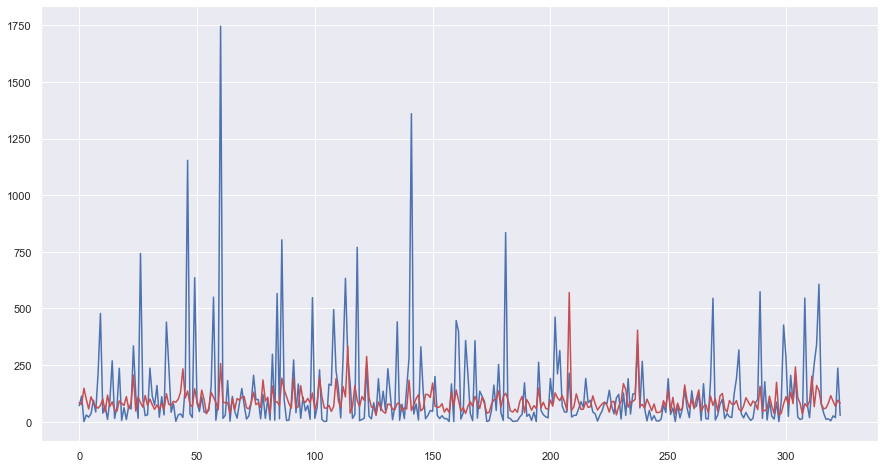

In [132]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_LR.Real)), output_LR.Real, '-b',label='Actual')
ax.plot(range(len(output_LR.Predicho)), output_LR.Predicho, 'r', label='Predicted')
plt.show()

C:\Users\Dani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Dani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


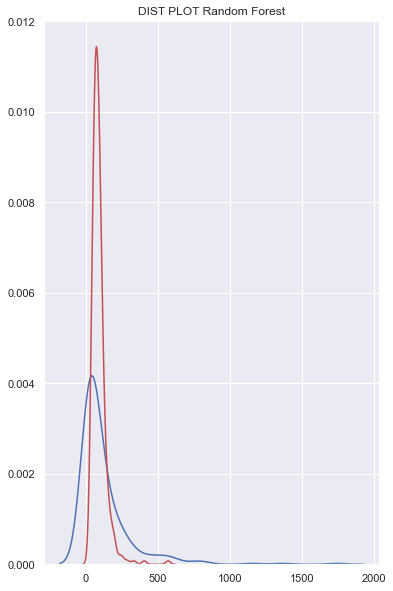

In [133]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(output_LR.Real, hist=False, color="b", label="Actual Value")
sns.distplot(output_LR.Predicho, hist=False, color="r", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

# DecisionTreeRegressor

In [134]:
iteraciones=5000

### parametros

In [135]:
parameters_DT={#'splitter': ['best', 'random'],
               'criterion':['mae'],
               'max_depth': np.arange(2,100,1), 
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               #'min_weight_fraction_leaf': np.arange(0.0,0.5,0.1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
              
            }

In [136]:
DT=DecisionTreeRegressor(random_state=0)
ran_DT=RandomizedSearchCV(DT,parameters_DT,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_DT.fit(X_train,y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_iter=5000, n_jobs=-1,
                   param_distributions={'criterion': ['mae'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
            

In [137]:
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))
print("CV score=%0.3f" % ran_DT.best_score_)
cv_results = ran_DT.cv_results_

Best parameters from Randomsearch: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mae'}
CV score=-4.489


MOTOR
RandomSearch

Best parameters from Randomsearch: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mae'}

DecisionTreeRegressor 

TRAIN 
Best score MAE=-4.4886


PREDICCIÓN  

MAE prediction:  4.439524750239082
R2 :0.0696


The Mean Square Error(MSE) or J(theta) is:  39.03662216032231

R square obtain for scikit learn library is : 0.06961145971121452

DecisionTreeRegressor 



Importancia DecisionTreeRegressor:
            feature  importancia
0      v_codigbus     0.081683
1          modelo     0.033025
2          v_edad     0.086771
3  Kmeans_cluster     0.010896
4   subarea_ant_2     0.129602
5      dias_ant_2     0.384103
6  aliasemp_ant_2     0.145617
7     capacidad_2     0.128303




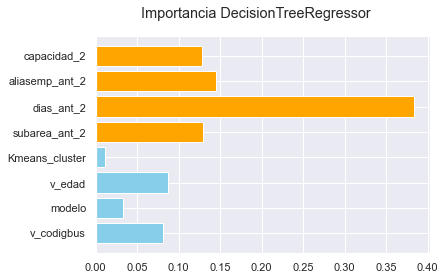

In [138]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))

print('\nDecisionTreeRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_DT.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_DT.best_params_
DT_ran = DecisionTreeRegressor(random_state=0,
                          criterion= model['criterion'],
                          #splitter=model['splitter'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          #min_weight_fraction_leaf=model['min_weight_fraction_leaf'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #ccp_alpha=model['ccp_alpha']
                                )




#Predicción
DT_ran.fit(X_train,y_train)
y_pred = DT_ran.predict(X_test)
mae_DT = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_DT)

r2_DT=r2_score(y_test, y_pred)#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_DT+'\n')


mse_DT = mean_squared_error(y_pred, y_test)

# R_square
R_square_DT = DT_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_DT)
print('\nR square obtain for scikit learn library is :',R_square_DT)   

print('\nDecisionTreeRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': DT_ran.feature_importances_})

print('Importancia DecisionTreeRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia DecisionTreeRegressor ')
x=X_test.columns
y=DT_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_DT = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

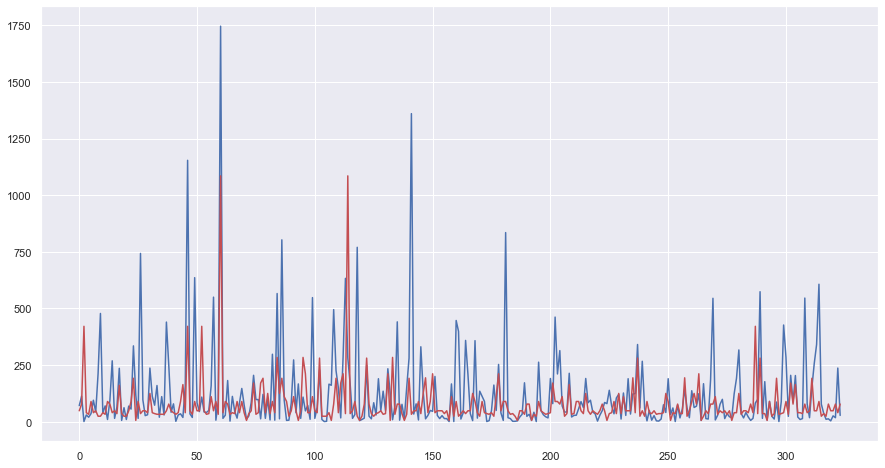

In [139]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_DT.Real)), output_DT.Real, '-b',label='Actual')
ax.plot(range(len(output_DT.Predicho)), output_DT.Predicho, 'r', label='Predicted')
plt.show()

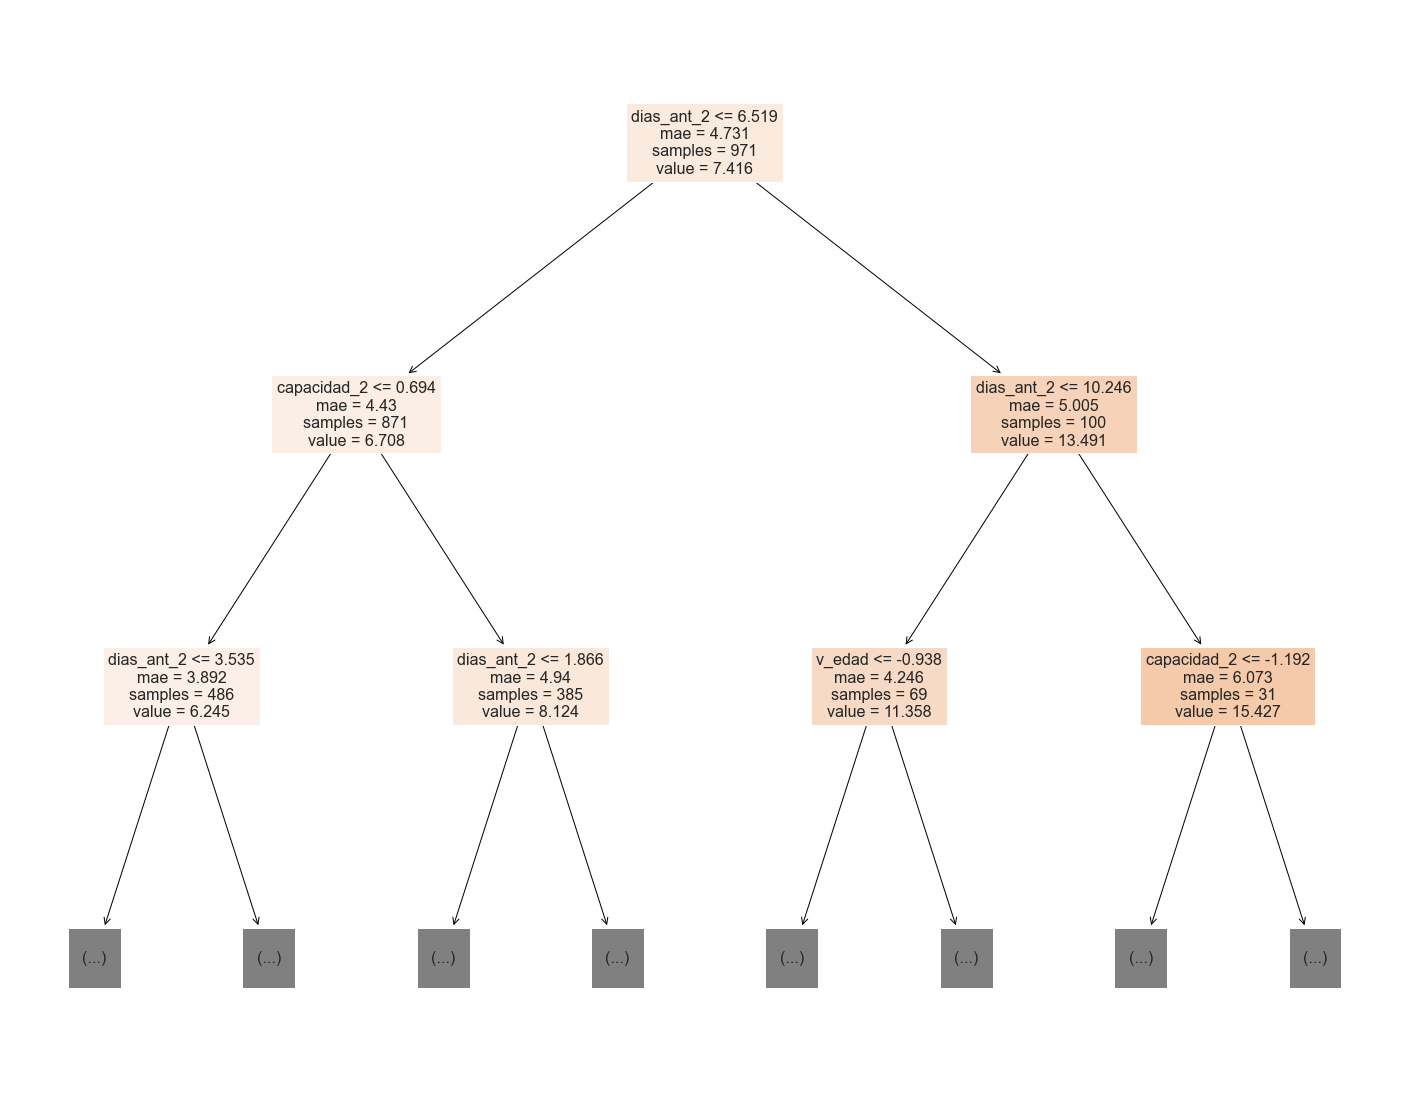

In [140]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_ran, 
                   feature_names=X_test.columns,  
                   class_names=y_test,
                   filled=True,
                   max_depth=2
                  )

In [141]:
text_representation = tree.export_text(DT_ran)
#r = export_text(decision_tree, feature_names=iris['feature_names'])
print(text_representation)

|--- feature_5 <= 6.52
|   |--- feature_7 <= 0.69
|   |   |--- feature_5 <= 3.53
|   |   |   |--- feature_4 <= 30.50
|   |   |   |   |--- feature_4 <= 20.50
|   |   |   |   |   |--- value: [5.74]
|   |   |   |   |--- feature_4 >  20.50
|   |   |   |   |   |--- value: [2.45]
|   |   |   |--- feature_4 >  30.50
|   |   |   |   |--- feature_7 <= 0.58
|   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- feature_7 >  0.58
|   |   |   |   |   |--- value: [11.18]
|   |   |--- feature_5 >  3.53
|   |   |   |--- feature_6 <= 0.03
|   |   |   |   |--- value: [33.13]
|   |   |   |--- feature_6 >  0.03
|   |   |   |   |--- feature_2 <= -1.65
|   |   |   |   |   |--- value: [13.07]
|   |   |   |   |--- feature_2 >  -1.65
|   |   |   |   |   |--- value: [6.96]
|   |--- feature_7 >  0.69
|   |   |--- feature_5 <= 1.87
|   |   |   |--- feature_1 <= 4.00
|   |   |   |   |--- value: [16.85]
|   |   |   |--- feature_1 >  4.00
|   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |--- value: [

# RandomForestRegressor

In [142]:
iteraciones=5000

### Parametros

In [143]:
parameters_RF={'bootstrap': [True, False],
               'criterion':['mae'],
               'max_depth': np.arange(2,200,1), 
               'min_samples_leaf': np.arange(1,5,1),
               'min_samples_split':  np.arange(2,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               'n_estimators':np.arange(10,100,1),
               #'oob_score':[True, False],
               #'ccp_alpha':np.arange(0.0,1,0.1)
               
            }

In [144]:
RF=RandomForestRegressor(random_state=0)
ran_RF=RandomizedSearchCV(RF,parameters_RF,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_RF.fit(X_train,y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=5000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mae'],
                                        'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61...
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       

In [145]:
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))
print("CV score=%0.3f" % ran_RF.best_score_)
cv_results = ran_RF.cv_results_

Best parameters from Randomsearch: {'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'mae', 'bootstrap': True}
CV score=-4.317


MOTOR
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'mae', 'bootstrap': True}

RandomForestRegressorr 

TRAIN 
Best score MAE=-4.3168


PREDICCIÓN  

MAE prediction:  4.2001117917336535
R2 :0.1448


The Mean Square Error(MSE) or J(theta) is:  35.88033945665821

R square obtain for scikit learn library is : 0.1448374678770945

RandomForestRegressor 



Importancia RandomForestRegressor:
            feature  importancia
0      v_codigbus     0.082139
1          modelo     0.090819
2          v_edad     0.085567
3  Kmeans_cluster     0.015042
4   subarea_ant_2     0.187309
5      dias_ant_2     0.389365
6  aliasemp_ant_2     0.070197
7     capacidad_2     0.079562




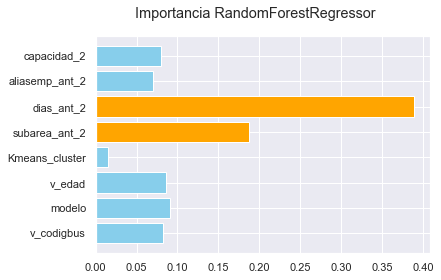

In [146]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))

print('\nRandomForestRegressorr \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_RF.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_RF.best_params_
RF_ran = RandomForestRegressor(random_state=0,
                          criterion= model['criterion'],
                          bootstrap=model['bootstrap'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          n_estimators=model['n_estimators'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #oob_score=model['oob_score'],     
                          #ccp_alpha=model['ccp_alpha']
                              )



#Predicción
RF_ran.fit(X_train,y_train)
y_pred = RF_ran.predict(X_test)
mae_RF = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_RF)

r2_RF=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_RF+'\n')

mse_RF = mean_squared_error(y_pred, y_test)

# R_square
R_square_RF = RF_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_RF)
print('\nR square obtain for scikit learn library is :',R_square_RF)  



print('\nRandomForestRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia RandomForestRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia RandomForestRegressor ')
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_RF = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

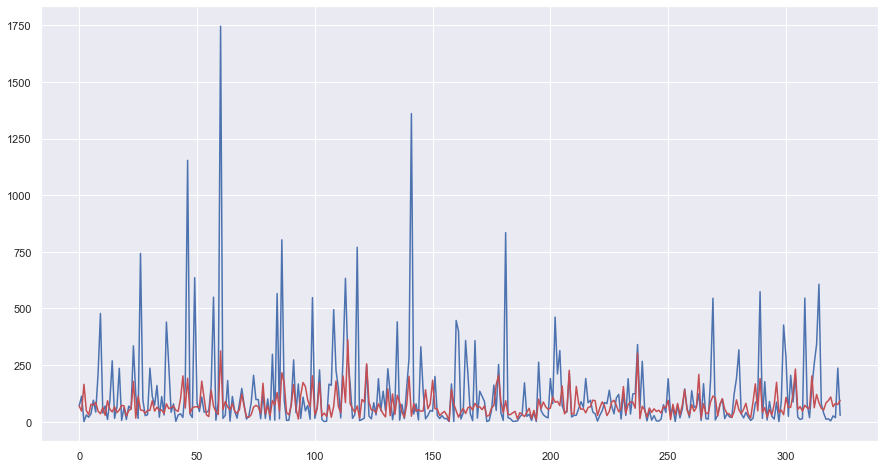

In [147]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_RF.Real)), output_RF.Real, '-b',label='Actual')
ax.plot(range(len(output_RF.Predicho)), output_RF.Predicho, 'r', label='Predicted')
plt.show()

# AdaBoostRegressor

In [151]:
iteraciones=10

### Parametros

In [152]:
parameters_AB={'base_estimator': [RF_ran],# DT_ran],
               'n_estimators':np.arange(10,100,1),
               'learning_rate':np.arange(0.1,2,0.1),
               'loss':['linear', 'square', 'exponential'] 
            }

In [153]:
AB=AdaBoostRegressor(random_state=0)
ran_AB=RandomizedSearchCV(AB,parameters_AB,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_AB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'base_estimator': [RandomForestRegressor(criterion='mae',
                                                                                 max_depth=6,
                                                                                 min_samples_leaf=4,
                                                                                 min_samples_split=3,
                                                                                 n_estimators=80,
                                                                                 random_state=0)],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'loss': ['li...
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

In [154]:
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))
print("CV score=%0.3f" % ran_AB.best_score_)
cv_results = ran_AB.cv_results_

Best parameters from Randomsearch: {'n_estimators': 53, 'loss': 'exponential', 'learning_rate': 0.4, 'base_estimator': RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=80, random_state=0)}
CV score=-4.893


MOTOR
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 53, 'loss': 'exponential', 'learning_rate': 0.4, 'base_estimator': RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=80, random_state=0)}

AdaBoostRegressor 

TRAIN 
Best score MAE=-4.8932


PREDICCIÓN  

MAE prediction:  4.787568004877884
R2 :0.1496


The Mean Square Error(MSE) or J(theta) is:  35.6809613955581

R square obtain for scikit learn library is : 0.14958939191577547

AdaBoostRegressor 



Importancia AdaBoostRegressor:
            feature  importancia
0      v_codigbus     0.137250
1          modelo     0.123609
2          v_edad     0.091184
3  Kmeans_cluster     0.019578
4   subarea_ant_2     0.159452
5      dias_ant_2     0.245753
6  aliasemp_ant_2     0.114508
7     capacidad_2     0.108665




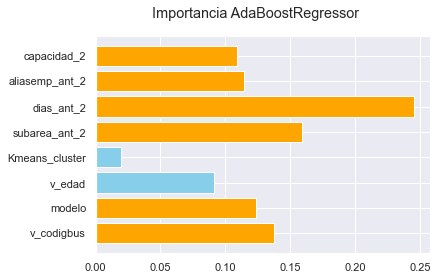

In [155]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_AB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_AB.best_params_
AB_ran = AdaBoostRegressor(random_state=0,
                          base_estimator= model['base_estimator'],
                          n_estimators=model['n_estimators'],
                          learning_rate=model['learning_rate'],
                          loss=model['loss']
                              )



#Predicción
AB_ran.fit(X_train,y_train)
y_pred = AB_ran.predict(X_test)
mae_AB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_AB)

r2_AB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_AB+'\n')

mse_AB = mean_squared_error(y_pred, y_test)

# R_square
R_square_AB = AB_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_AB)
print('\nR square obtain for scikit learn library is :',R_square_AB)  



print('\nAdaBoostRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': AB_ran.feature_importances_})

print('Importancia AdaBoostRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia AdaBoostRegressor ')
x=X_test.columns
y=AB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_AB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

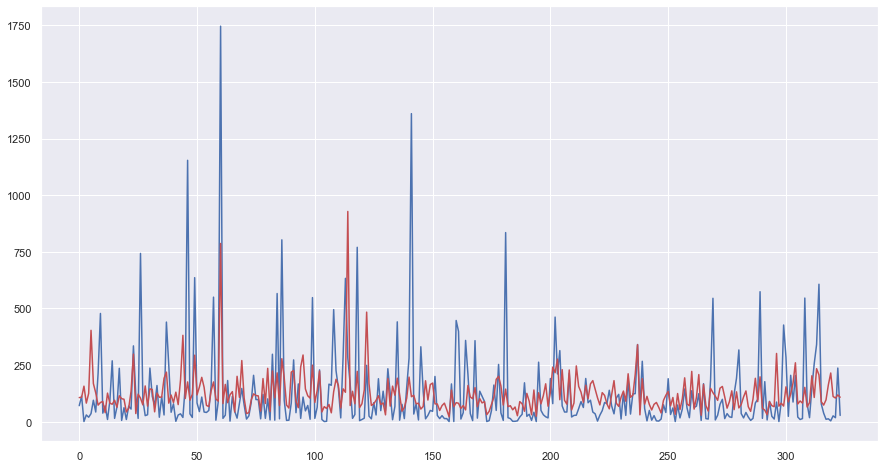

In [156]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_AB.Real)), output_AB.Real, '-b',label='Actual')
ax.plot(range(len(output_AB.Predicho)), output_AB.Predicho, 'r', label='Predicted')
plt.show()

# GradientBoostingRegressor

In [157]:
iteraciones=10

### Parametros

In [158]:
parameters_GB={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 
               'learning_rate':np.arange(0.1,2,0.1),
               'n_estimators':np.arange(10,150,1), 
               #'subsample':np.arange(0.1,2,0.1),
               'criterion':['mae'],
               'min_samples_split':  np.arange(2,11,1),
               'min_samples_leaf': np.arange(1,5,1),
               #'min_weight_fraction_leaf':np.arange(0.0,1,0.1),
               'max_depth': np.arange(2,50,1),
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'init':[None],
               'max_features':['auto', 'sqrt', 'log2'],
               #'alpha':np.arange(0.1,1.5,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
            }

In [159]:
GB=GradientBoostingRegressor(random_state=0)
ran_GB=RandomizedSearchCV(GB,parameters_GB,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_GB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ -7.24750388 -80.25421759  -9.00784424          nan          nan
  -4.73707278  -7.98085074  -9.83403354          nan  -4.85839427]
  warnings.warn(
C:\Users\Dani\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mae'],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 12

In [160]:
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))
print("CV score=%0.3f" % ran_GB.best_score_)
cv_results = ran_GB.cv_results_

Best parameters from Randomsearch: {'n_estimators': 39, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 27, 'loss': 'huber', 'learning_rate': 0.30000000000000004, 'criterion': 'mae'}
CV score=-4.737


MOTOR
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 39, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 27, 'loss': 'huber', 'learning_rate': 0.30000000000000004, 'criterion': 'mae'}

AdaBoostRegressor 

TRAIN 
Best score MAE=-4.7371




C:\Users\Dani\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


PREDICCIÓN  

MAE prediction:  4.634788797235122
R2 :0.0537


The Mean Square Error(MSE) or J(theta) is:  39.70478564078389

R square obtain for scikit learn library is : 0.053686627826226574

GradientBoostingRegressor 



Importancia GradientBoostingRegressor:
            feature  importancia
0      v_codigbus     0.126588
1          modelo     0.108415
2          v_edad     0.125263
3  Kmeans_cluster     0.023657
4   subarea_ant_2     0.157512
5      dias_ant_2     0.261801
6  aliasemp_ant_2     0.115367
7     capacidad_2     0.081397




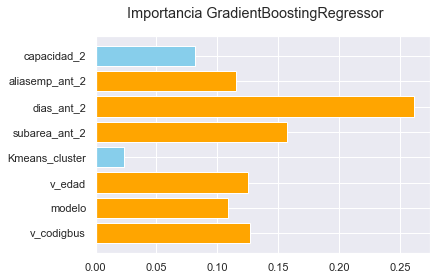

In [161]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_GB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_GB.best_params_
GB_ran = GradientBoostingRegressor(random_state=0,
                          loss= model['loss'],
                          learning_rate=model['learning_rate'],
                          n_estimators=model['n_estimators'],
                          #subsample=model['subsample'],
                          criterion=model['criterion'],
                          min_samples_split=model['min_samples_split'],
                          min_samples_leaf=model['min_samples_leaf'],
                          max_depth=model['max_depth'],
                          max_features=model['max_features']
                              )






#Predicción
GB_ran.fit(X_train,y_train)
y_pred = GB_ran.predict(X_test)
mae_GB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_GB)

r2_GB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_GB+'\n')


mse_GB = mean_squared_error(y_pred, y_test)

# R_square
R_square_GB = GB_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_GB)
print('\nR square obtain for scikit learn library is :',R_square_GB)  


print('\nGradientBoostingRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': GB_ran.feature_importances_})

print('Importancia GradientBoostingRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia GradientBoostingRegressor ')
x=X_test.columns
y=GB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_GB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

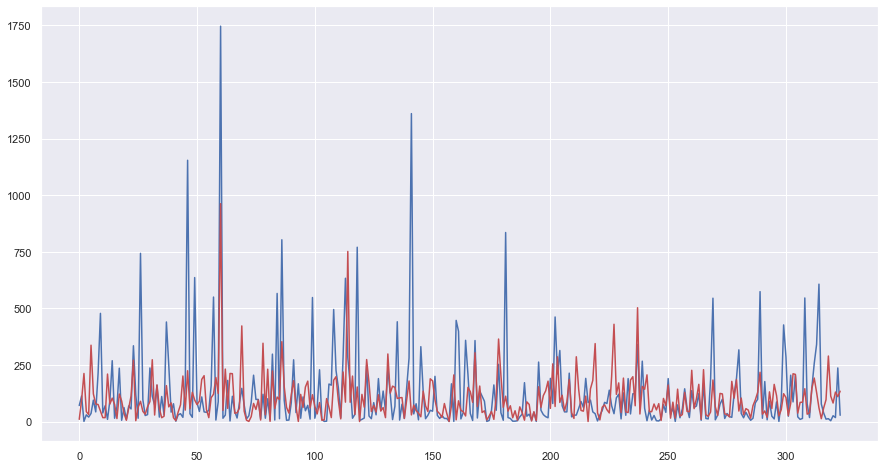

In [162]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_GB.Real)), output_GB.Real, '-b',label='Actual')
ax.plot(range(len(output_GB.Predicho)), output_GB.Predicho, 'r', label='Predicted')
plt.show()

In [163]:
target= 'motor'

In [164]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'TERMINADO'+'\n')

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


In [165]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


In [166]:
print(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 

MOTOR
Fecha: 18-2-2022 Hora: 13:35
SCORE
LR 
MAE: 4.4286
MSE: 35.0208
R sqrt: 0.1653

DT 
MAE: 4.4395
MSE: 39.0366
R sqrt: 0.0696

RF 
MAE: 4.2001
MSE: 35.8803
R sqrt: 0.1448

AB 
MAE: 4.7876
MSE: 35.6810
R sqrt: 0.1496

GB 
MAE: 4.6348
MSE: 39.7048
R sqrt: 0.0537


